In [1]:
def graph_v1(file):
    dat=pd.read_csv(file)
    for i in dat.columns:
        if i in dat.loc[:,dat.dtypes==object]:
            dat[i].value_counts().plot(kind='bar', figsize=(10,8), color='turquoise', fontsize=12, rot=0)
            plt.xlabel(i,fontsize=15)
            plt.ylabel('Frequency',fontsize=15)
            fig=plt.gcf() #This is helping us save the figure 
            plt.show()
            fig.savefig(i+'.jpg',dpi=100) #Tried getting png images but we are getting distroted images 
            #Hence saving as jpg images 
        else:
            plt.subplot(2,1,2)
            plt.hist(dat[i],histtype='bar',bins=20,color='turquoise',edgecolor='white')
            plt.xlabel(i)
            plt.ylabel('Frequency')

            plt.subplot(2,1,1)
            plt.boxplot(dat[i], vert=False)
            plt.title(f'Distribution of {i}')
            fig1=plt.gcf()
            plt.show()
            fig1.savefig(i+'.jpg',dpi=100)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

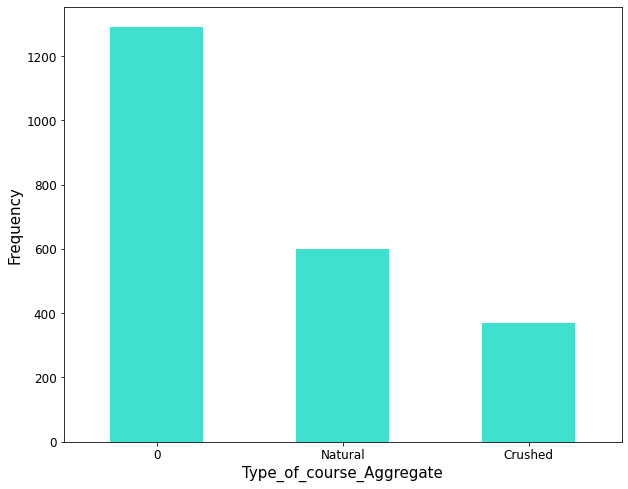

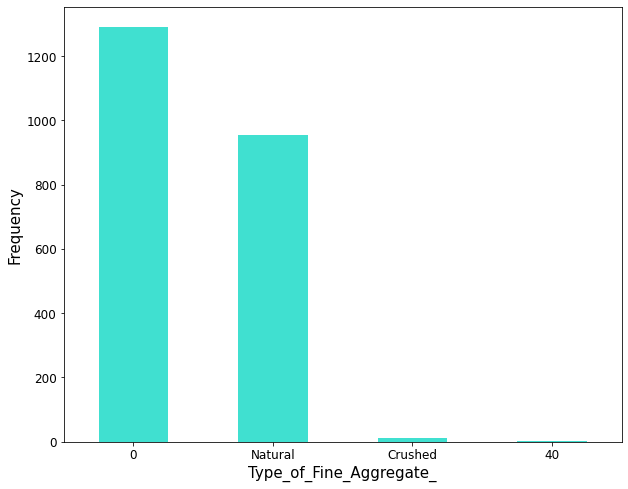

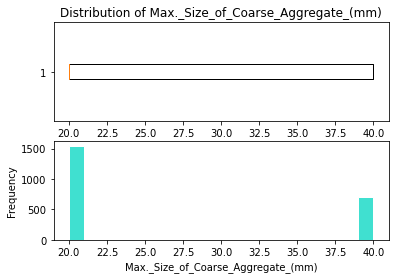

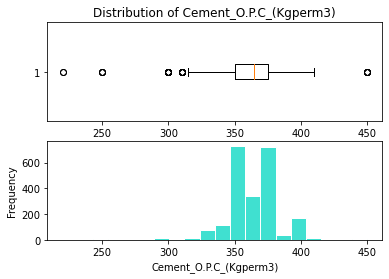

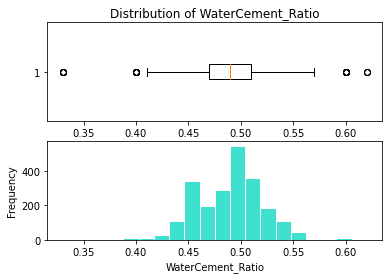

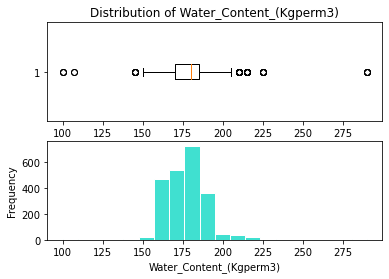

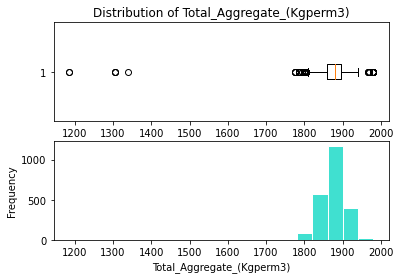

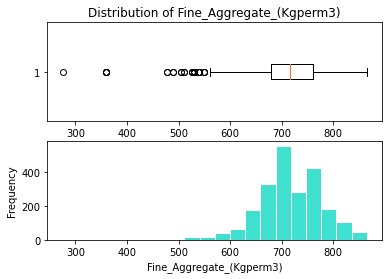

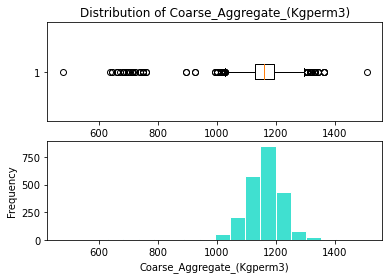

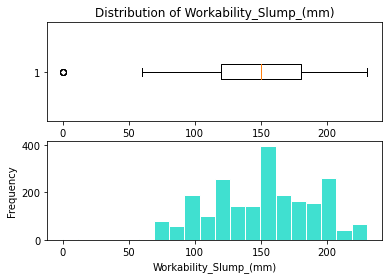

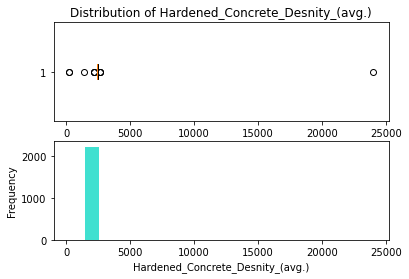

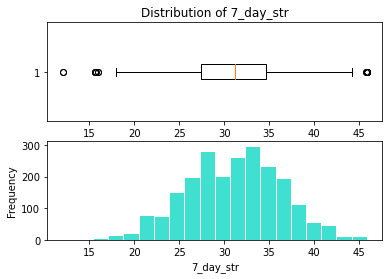

In [3]:
graph_v1("C:\\Users\\Andrew\\Downloads\\2500 Concrete design mixes.csv")

In [4]:
df=pd.read_csv("C:\\Users\\Andrew\\Downloads\\2500 Concrete design mixes.csv")

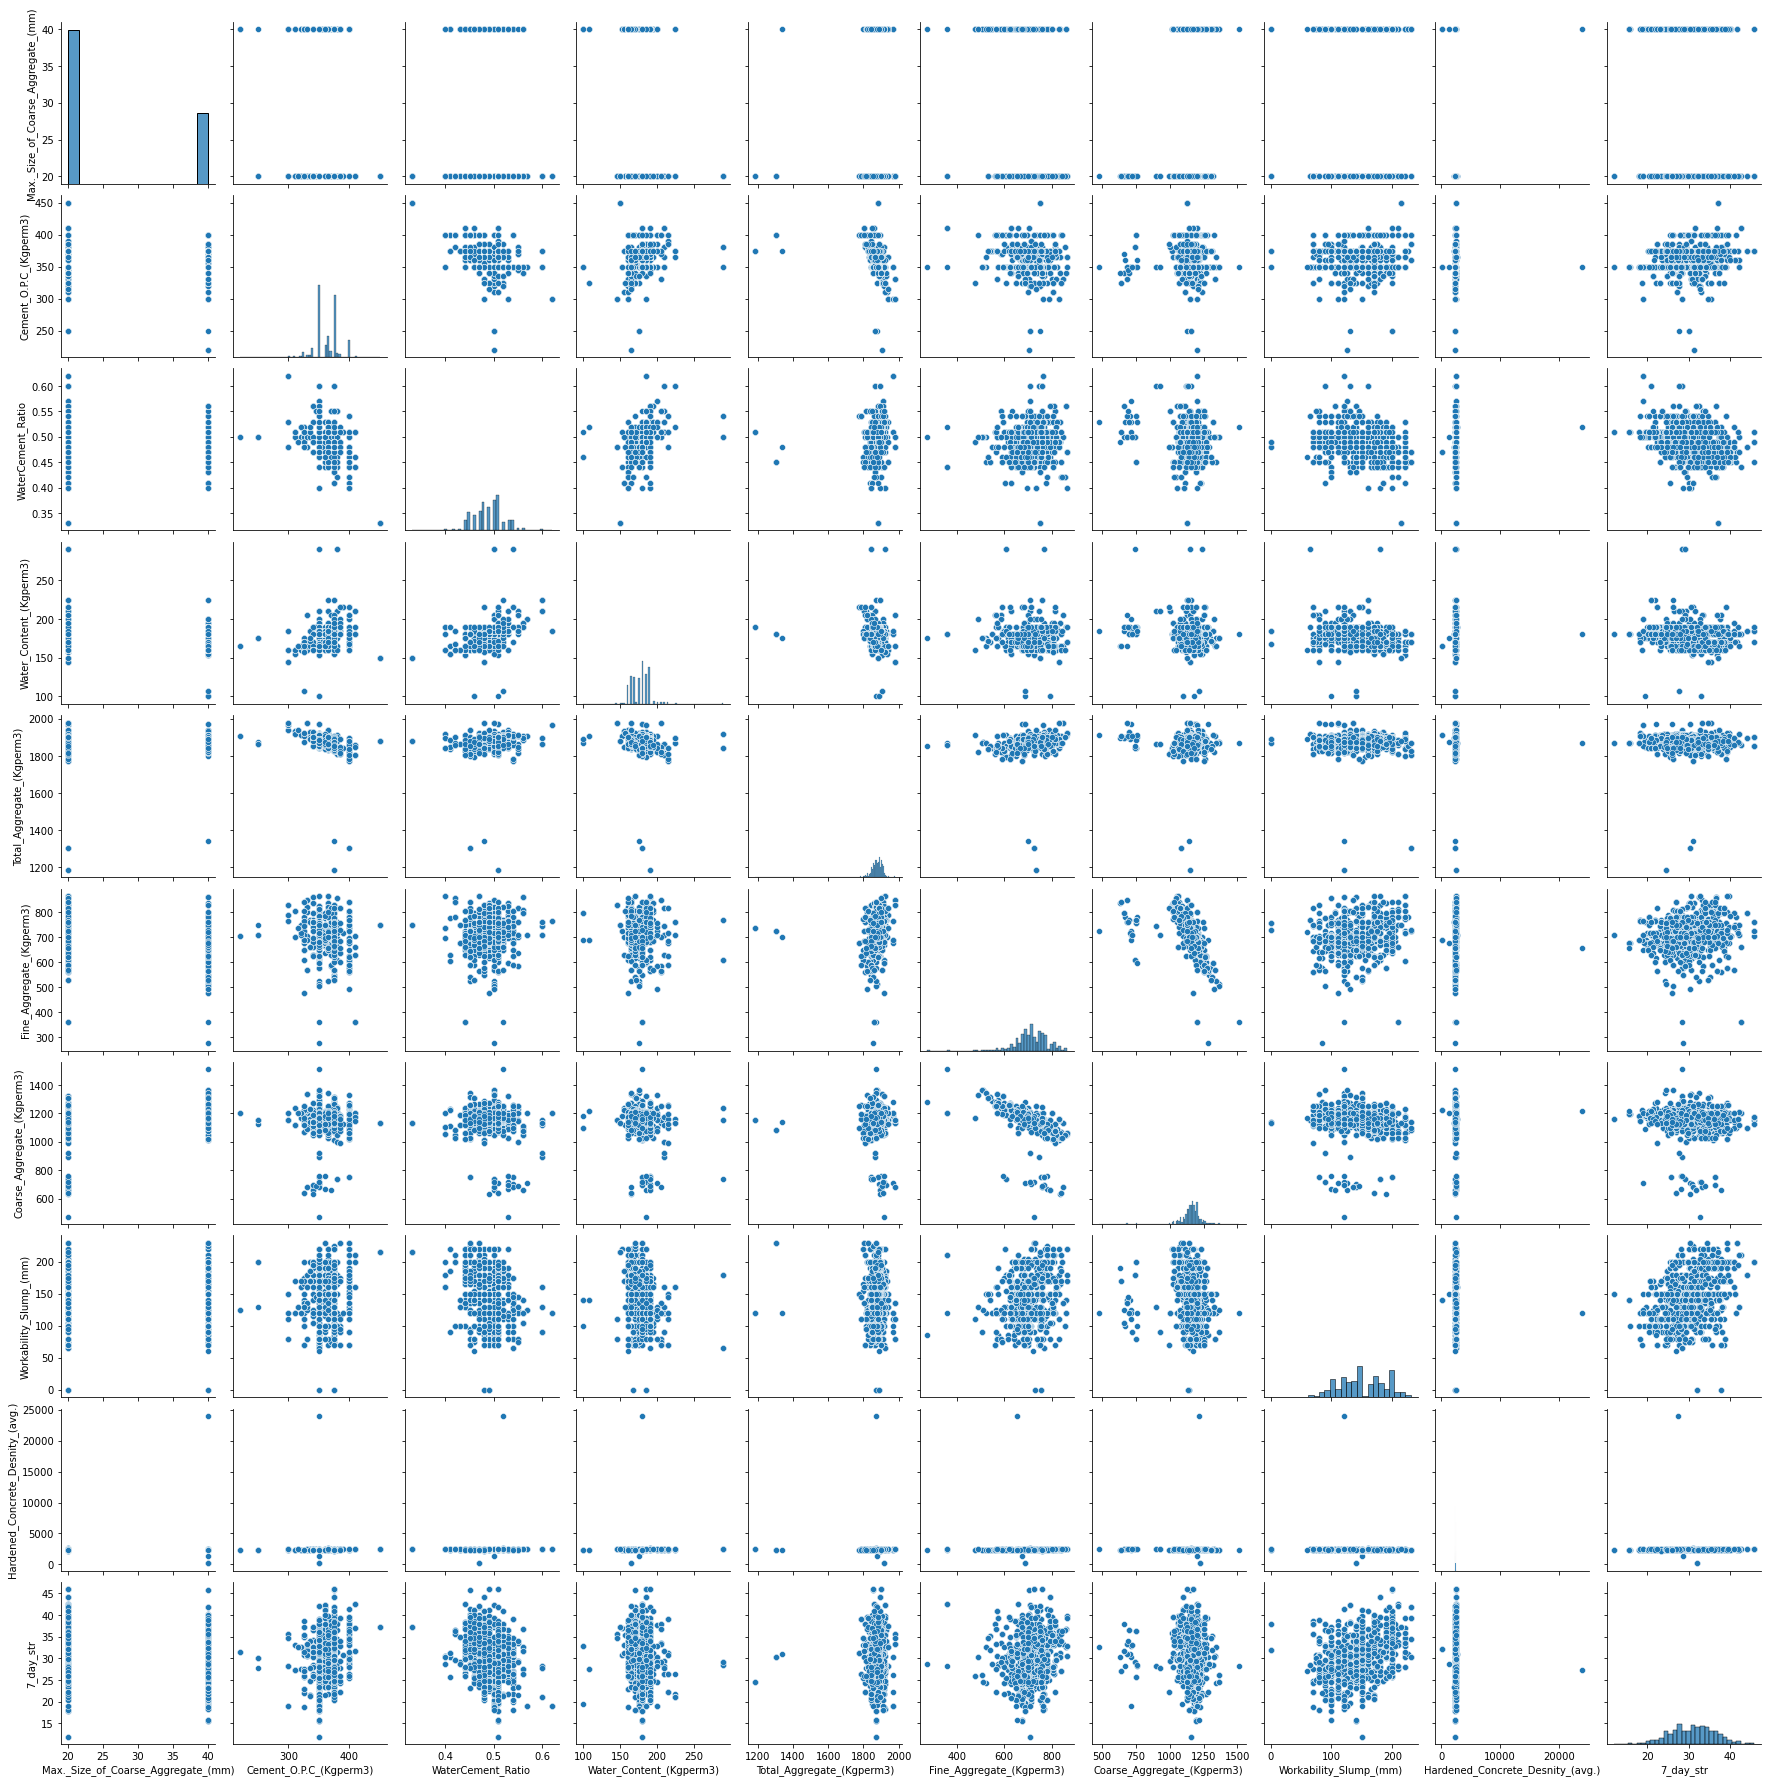

In [5]:
sns.pairplot(df)

In [6]:
df.head()

Type_of_course_Aggregate Type_of_Fine_Aggregate_  \
0                  Crushed                 Natural   
1                  Crushed                 Natural   
2                  Crushed                 Natural   
3                  Natural                 Natural   
4                  Natural                 Natural   

   Max._Size_of_Coarse_Aggregate_(mm)  Cement_O.P.C_(Kgperm3)  \
0                                  40                     365   
1                                  40                     365   
2                                  20                     350   
3                                  20                     340   
4                                  20                     325   

   WaterCement_Ratio  Water_Content_(Kgperm3)  Total_Aggregate_(Kgperm3)  \
0               0.52                      225                       1870   
1               0.52                      225                       1870   
2               0.53                      185                       1915   
3               0.49                      165                       1895   
4               0.51                      165                       1910   

   Fine_Aggregate_(Kgperm3)  Coarse_Aggregate_(Kgperm3)  \
0                       710                        1160   
1                       710                        1160   
2                       725                        1190   
3                       835                        1060   
4                       840                        1070   

   Workability_Slump_(mm)  Hardened_Concrete_Desnity_(avg.)  7_day_str  
0                     160                            2407.0       21.8  
1                     160                            2403.0       26.3  
2                     120                            2475.0       32.7  
3                     190                            2412.0       30.3  
4                     170                            2404.0       27.0

In [13]:
X=df.iloc[:,2:-1]
y=df.iloc[:,-1]
X

Max._Size_of_Coarse_Aggregate_(mm)  Cement_O.P.C_(Kgperm3)  \
0                                     40                     365   
1                                     40                     365   
2                                     20                     350   
3                                     20                     340   
4                                     20                     325   
...                                  ...                     ...   
2252                                  20                     375   
2253                                  20                     375   
2254                                  20                     365   
2255                                  20                     385   
2256                                  20                     340   

      WaterCement_Ratio  Water_Content_(Kgperm3)  Total_Aggregate_(Kgperm3)  \
0                  0.52                      225                       1870   
1                  0.52                      225                       1870   
2                  0.53                      185                       1915   
3                  0.49                      165                       1895   
4                  0.51                      165                       1910   
...                 ...                      ...                        ...   
2252               0.48                      180                       1845   
2253               0.45                      170                       1855   
2254               0.51                      185                       1900   
2255               0.47                      180                       1815   
2256               0.47                      160                       1900   

      Fine_Aggregate_(Kgperm3)  Coarse_Aggregate_(Kgperm3)  \
0                          710                        1160   
1                          710                        1160   
2                          725                        1190   
3                          835                        1060   
4                          840                        1070   
...                        ...                         ...   
2252                       665                        1180   
2253                       725                        1130   
2254                       800                        1200   
2255                       655                        1160   
2256                       760                        1140   

      Workability_Slump_(mm)  Hardened_Concrete_Desnity_(avg.)  
0                        160                            2407.0  
1                        160                            2403.0  
2                        120                            2475.0  
3                        190                            2412.0  
4                        170                            2404.0  
...                      ...                               ...  
2252                     150                            2404.0  
2253                     175                            2404.0  
2254                     135                            2454.0  
2255                      95                            2386.0  
2256                     195                            2402.0  

[2257 rows x 9 columns]

In [15]:
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [18]:
model=linear_model.LinearRegression()

In [19]:
model.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred=model.predict(x_test)

In [21]:
model.coef_

array([-5.50736525e-02,  3.39872368e-02, -3.38020332e+01,  5.42634333e-03,
        1.63406389e-02,  4.89782800e-03, -1.60524816e-04,  3.55733540e-02,
        6.18317363e-05])

In [22]:
model.intercept_

-3.7325308361802136

In [23]:
mean_squared_error(y_test,y_pred)

22.58559966815668

In [24]:
r2_score(y_test,y_pred)

0.2439983433956292

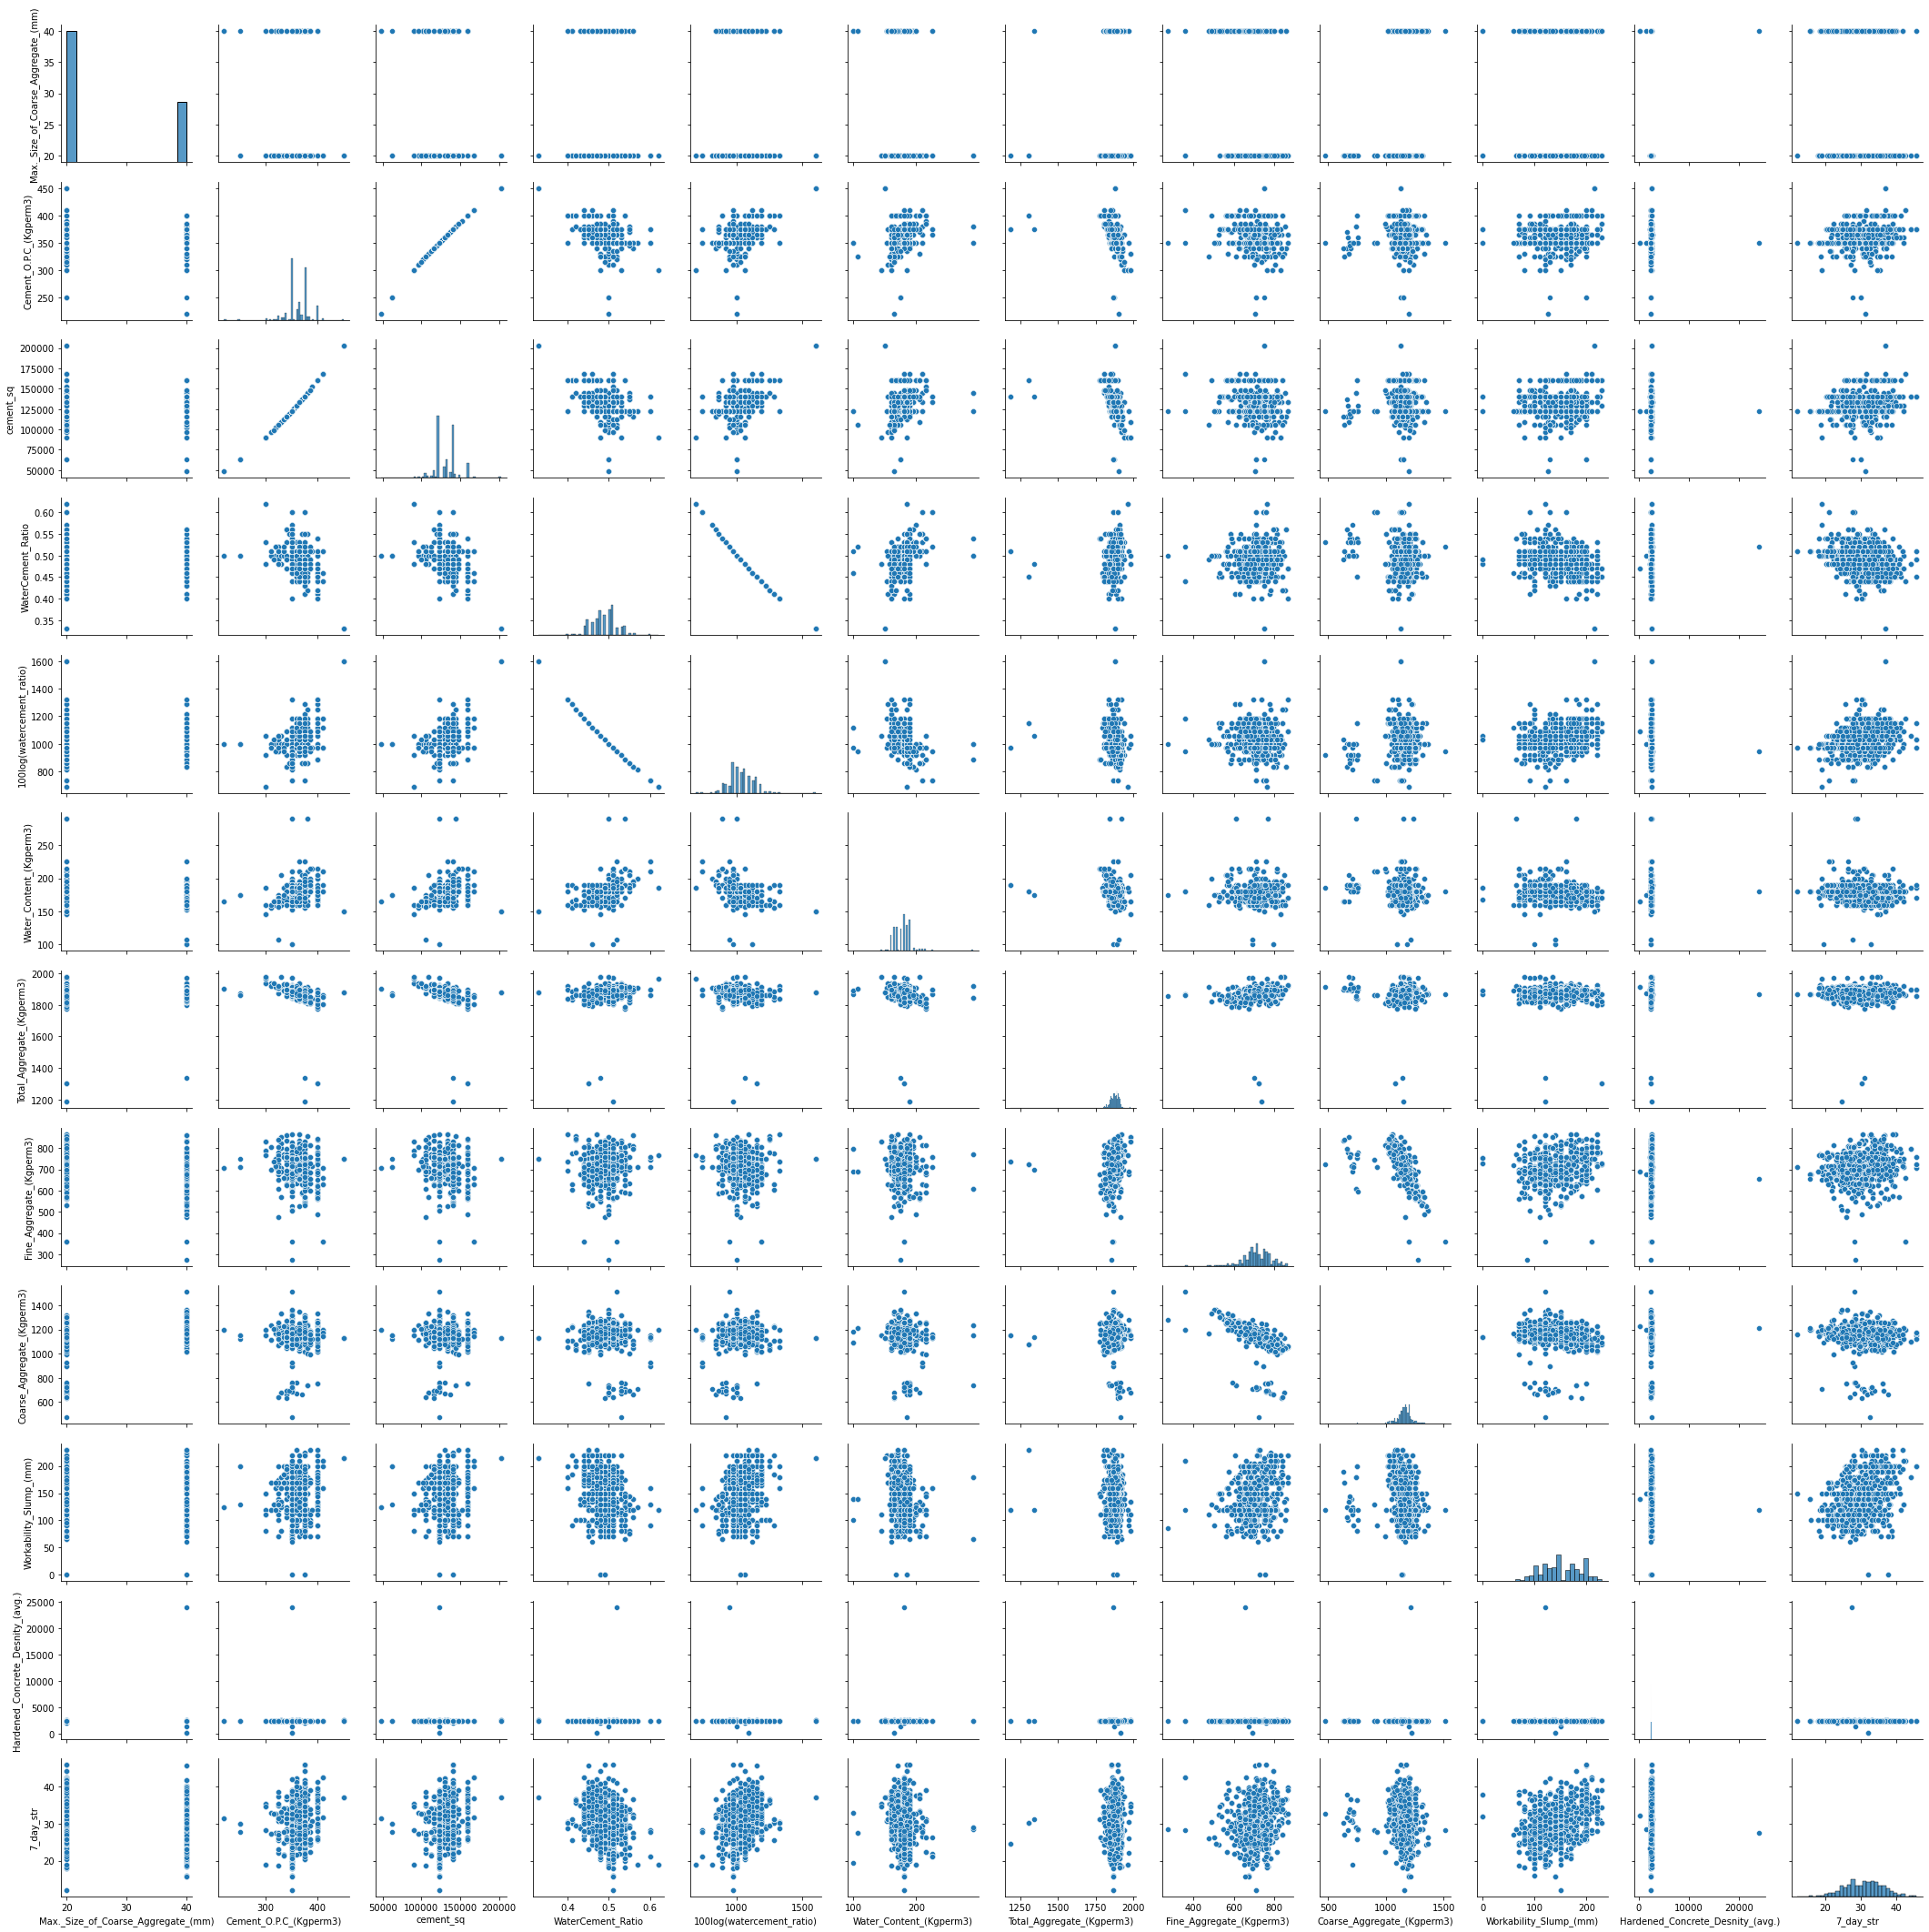

model.coef_ [-5.19442435e-02 -2.24767969e-01  3.81676985e-04 -2.44235621e+02
 -7.35077489e-02 -7.22232417e-03  1.80716479e-02  5.32436327e-03
 -5.06095119e-04  3.48744366e-02  6.72017955e-05]
model.intercept_ 217.85910118297912
mean_squared_error(y_test,y_pred) 22.06312680832423
r2_score(y_test,y_pred) 0.26148693583362614


In [25]:
df=pd.read_csv("C:\\Users\\Andrew\\Downloads\\2500 Concrete design mixes1.csv")

sns.pairplot(df)
plt.show()

df.head()

X=df.iloc[:,2:-1]
y=df.iloc[:,-1]
X

from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

model=linear_model.LinearRegression()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("model.coef_",model.coef_)

print("model.intercept_",model.intercept_)

print("mean_squared_error(y_test,y_pred)",mean_squared_error(y_test,y_pred))

print("r2_score(y_test,y_pred)",r2_score(y_test,y_pred))

In [26]:
df.head()

Type_of_course_Aggregate Type_of_Fine_Aggregate_  \
0                  Crushed                 Natural   
1                  Crushed                 Natural   
2                  Crushed                 Natural   
3                  Natural                 Natural   
4                  Natural                 Natural   

   Max._Size_of_Coarse_Aggregate_(mm)  Cement_O.P.C_(Kgperm3)  cement_sq  \
0                                  40                     365     133225   
1                                  40                     365     133225   
2                                  20                     350     122500   
3                                  20                     340     115600   
4                                  20                     325     105625   

   WaterCement_Ratio  100log(watercement_ratio)  Water_Content_(Kgperm3)  \
0               0.52                 943.416472                      225   
1               0.52                 943.416472                      225   
2               0.53                 915.935735                      185   
3               0.49                1029.146346                      165   
4               0.51                 971.430848                      165   

   Total_Aggregate_(Kgperm3)  Fine_Aggregate_(Kgperm3)  \
0                       1870                       710   
1                       1870                       710   
2                       1915                       725   
3                       1895                       835   
4                       1910                       840   

   Coarse_Aggregate_(Kgperm3)  Workability_Slump_(mm)  \
0                        1160                     160   
1                        1160                     160   
2                        1190                     120   
3                        1060                     190   
4                        1070                     170   

   Hardened_Concrete_Desnity_(avg.)  7_day_str  
0                            2407.0       21.8  
1                            2403.0       26.3  
2                            2475.0       32.7  
3                            2412.0       30.3  
4                            2404.0       27.0

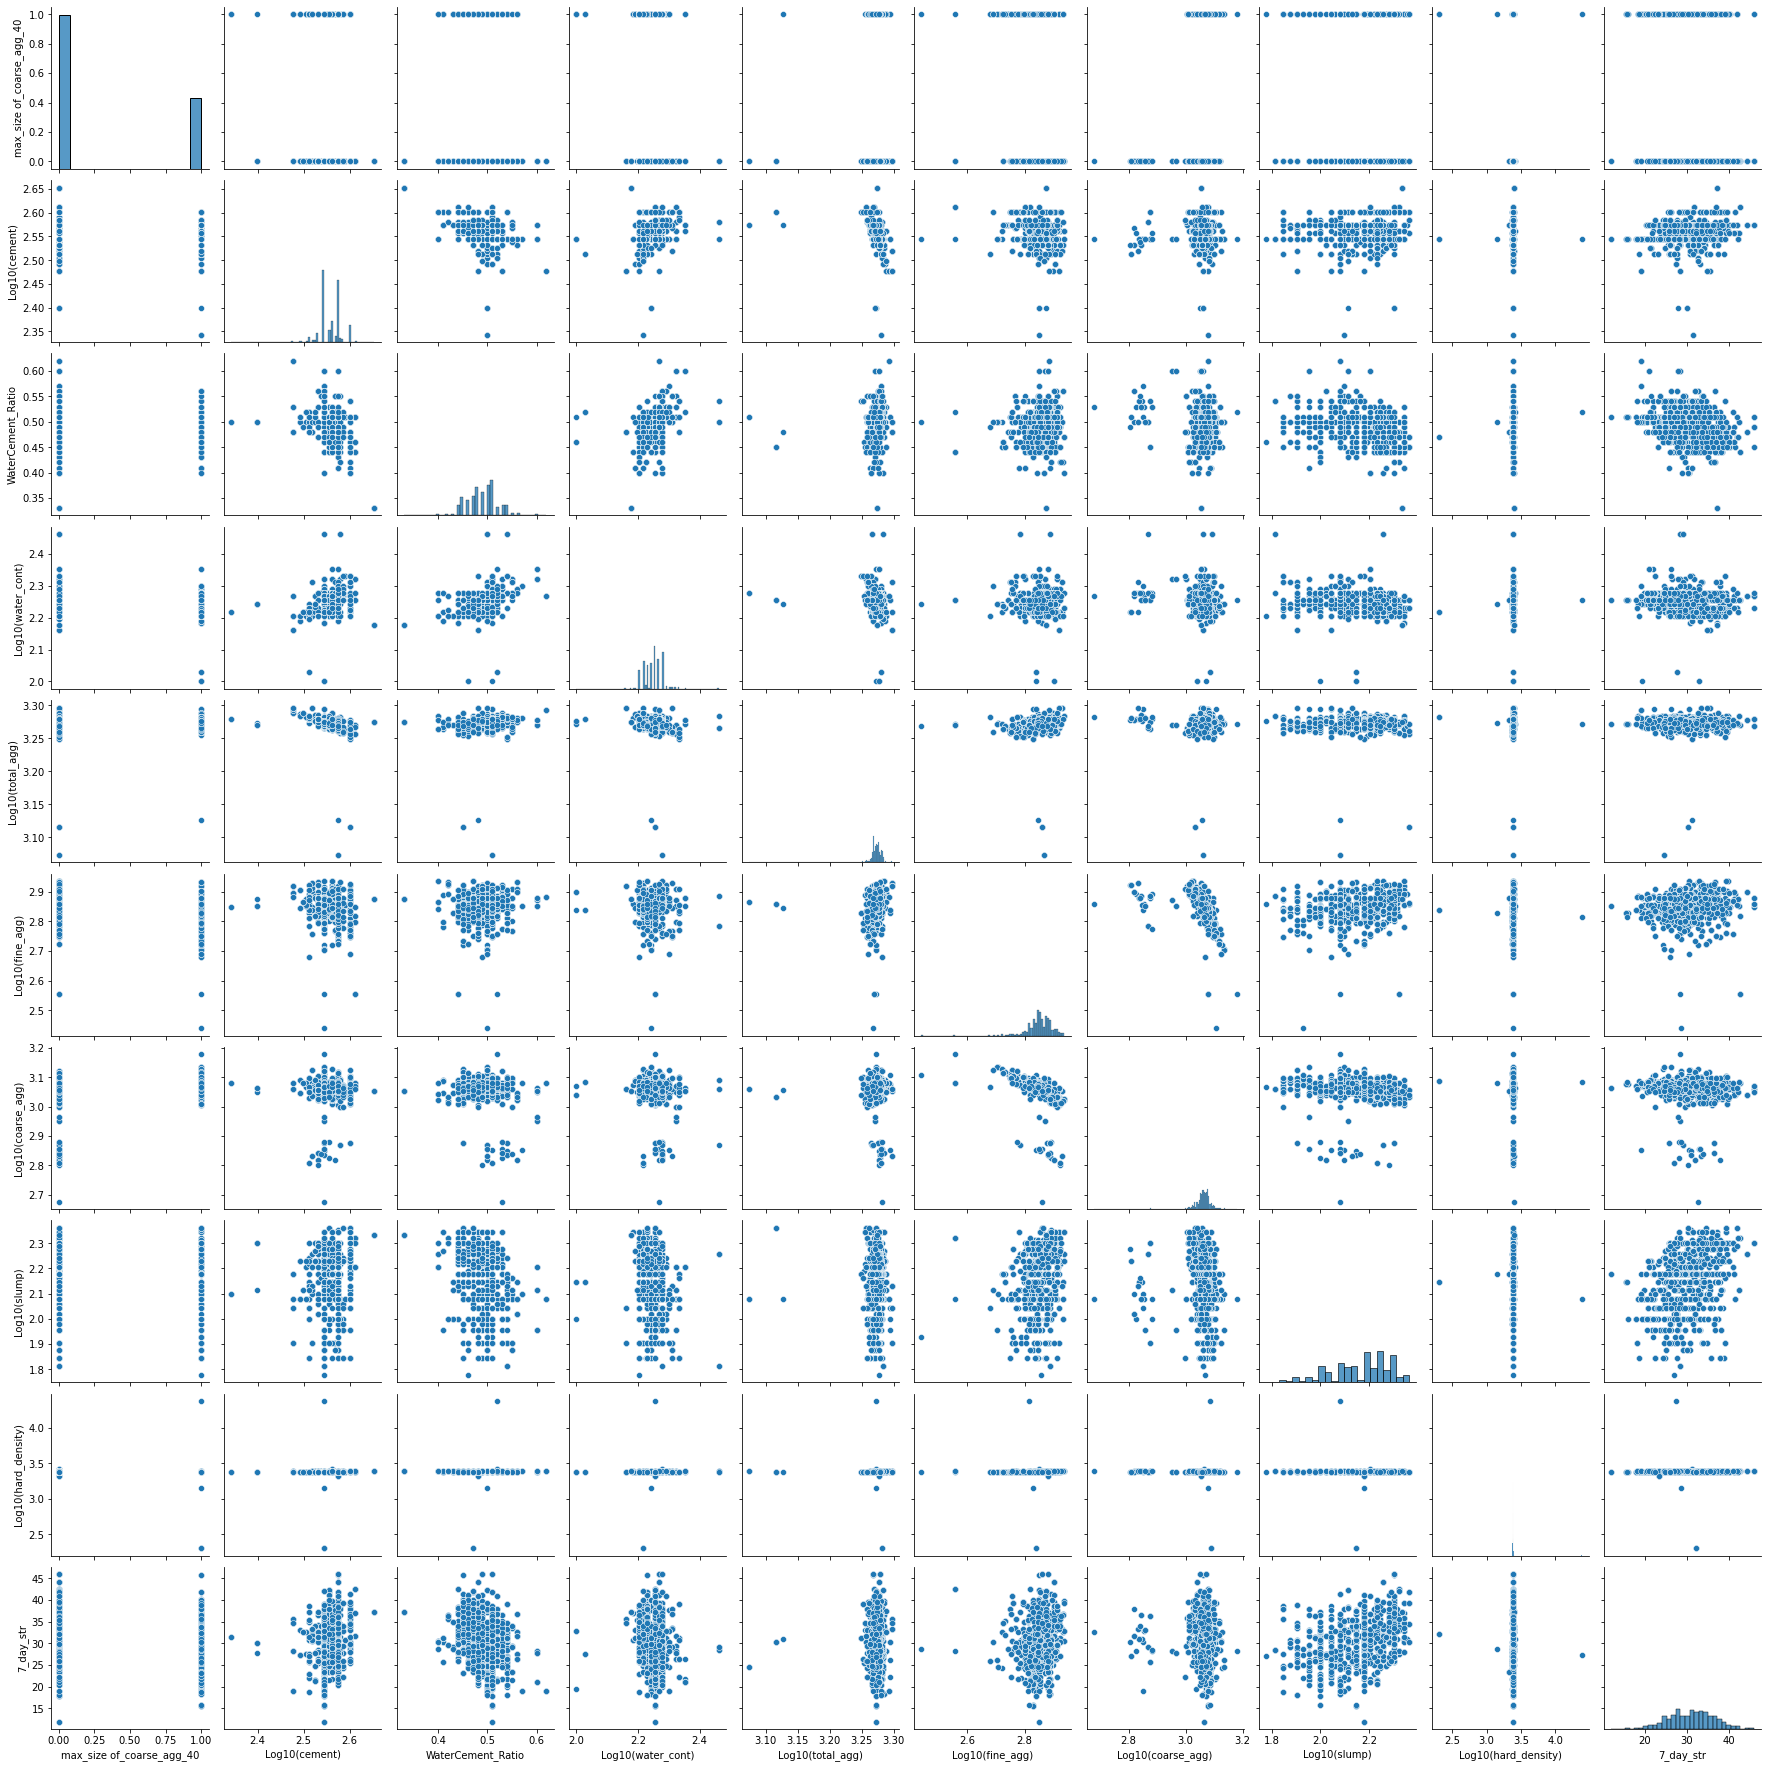

model.coef_ [ -1.2168573   21.89174068 -36.43051299   3.52417068  56.03656319
   3.95615869  -4.19284313  11.80141756   1.12032048]
model.intercept_ -225.87441830357363
mean_squared_error(y_test,y_pred) 22.788709057307038
r2_score(y_test,y_pred) 0.23719971785875382


In [28]:
df=pd.read_csv("C:\\Users\\Andrew\\Downloads\\2500 Concrete design mixes2.csv")

sns.pairplot(df)
plt.show()

df.head()

X=df.iloc[:,2:-1]
y=df.iloc[:,-1]
X

from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

model=linear_model.LinearRegression()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("model.coef_",model.coef_)

print("model.intercept_",model.intercept_)

print("mean_squared_error(y_test,y_pred)",mean_squared_error(y_test,y_pred))

print("r2_score(y_test,y_pred)",r2_score(y_test,y_pred))

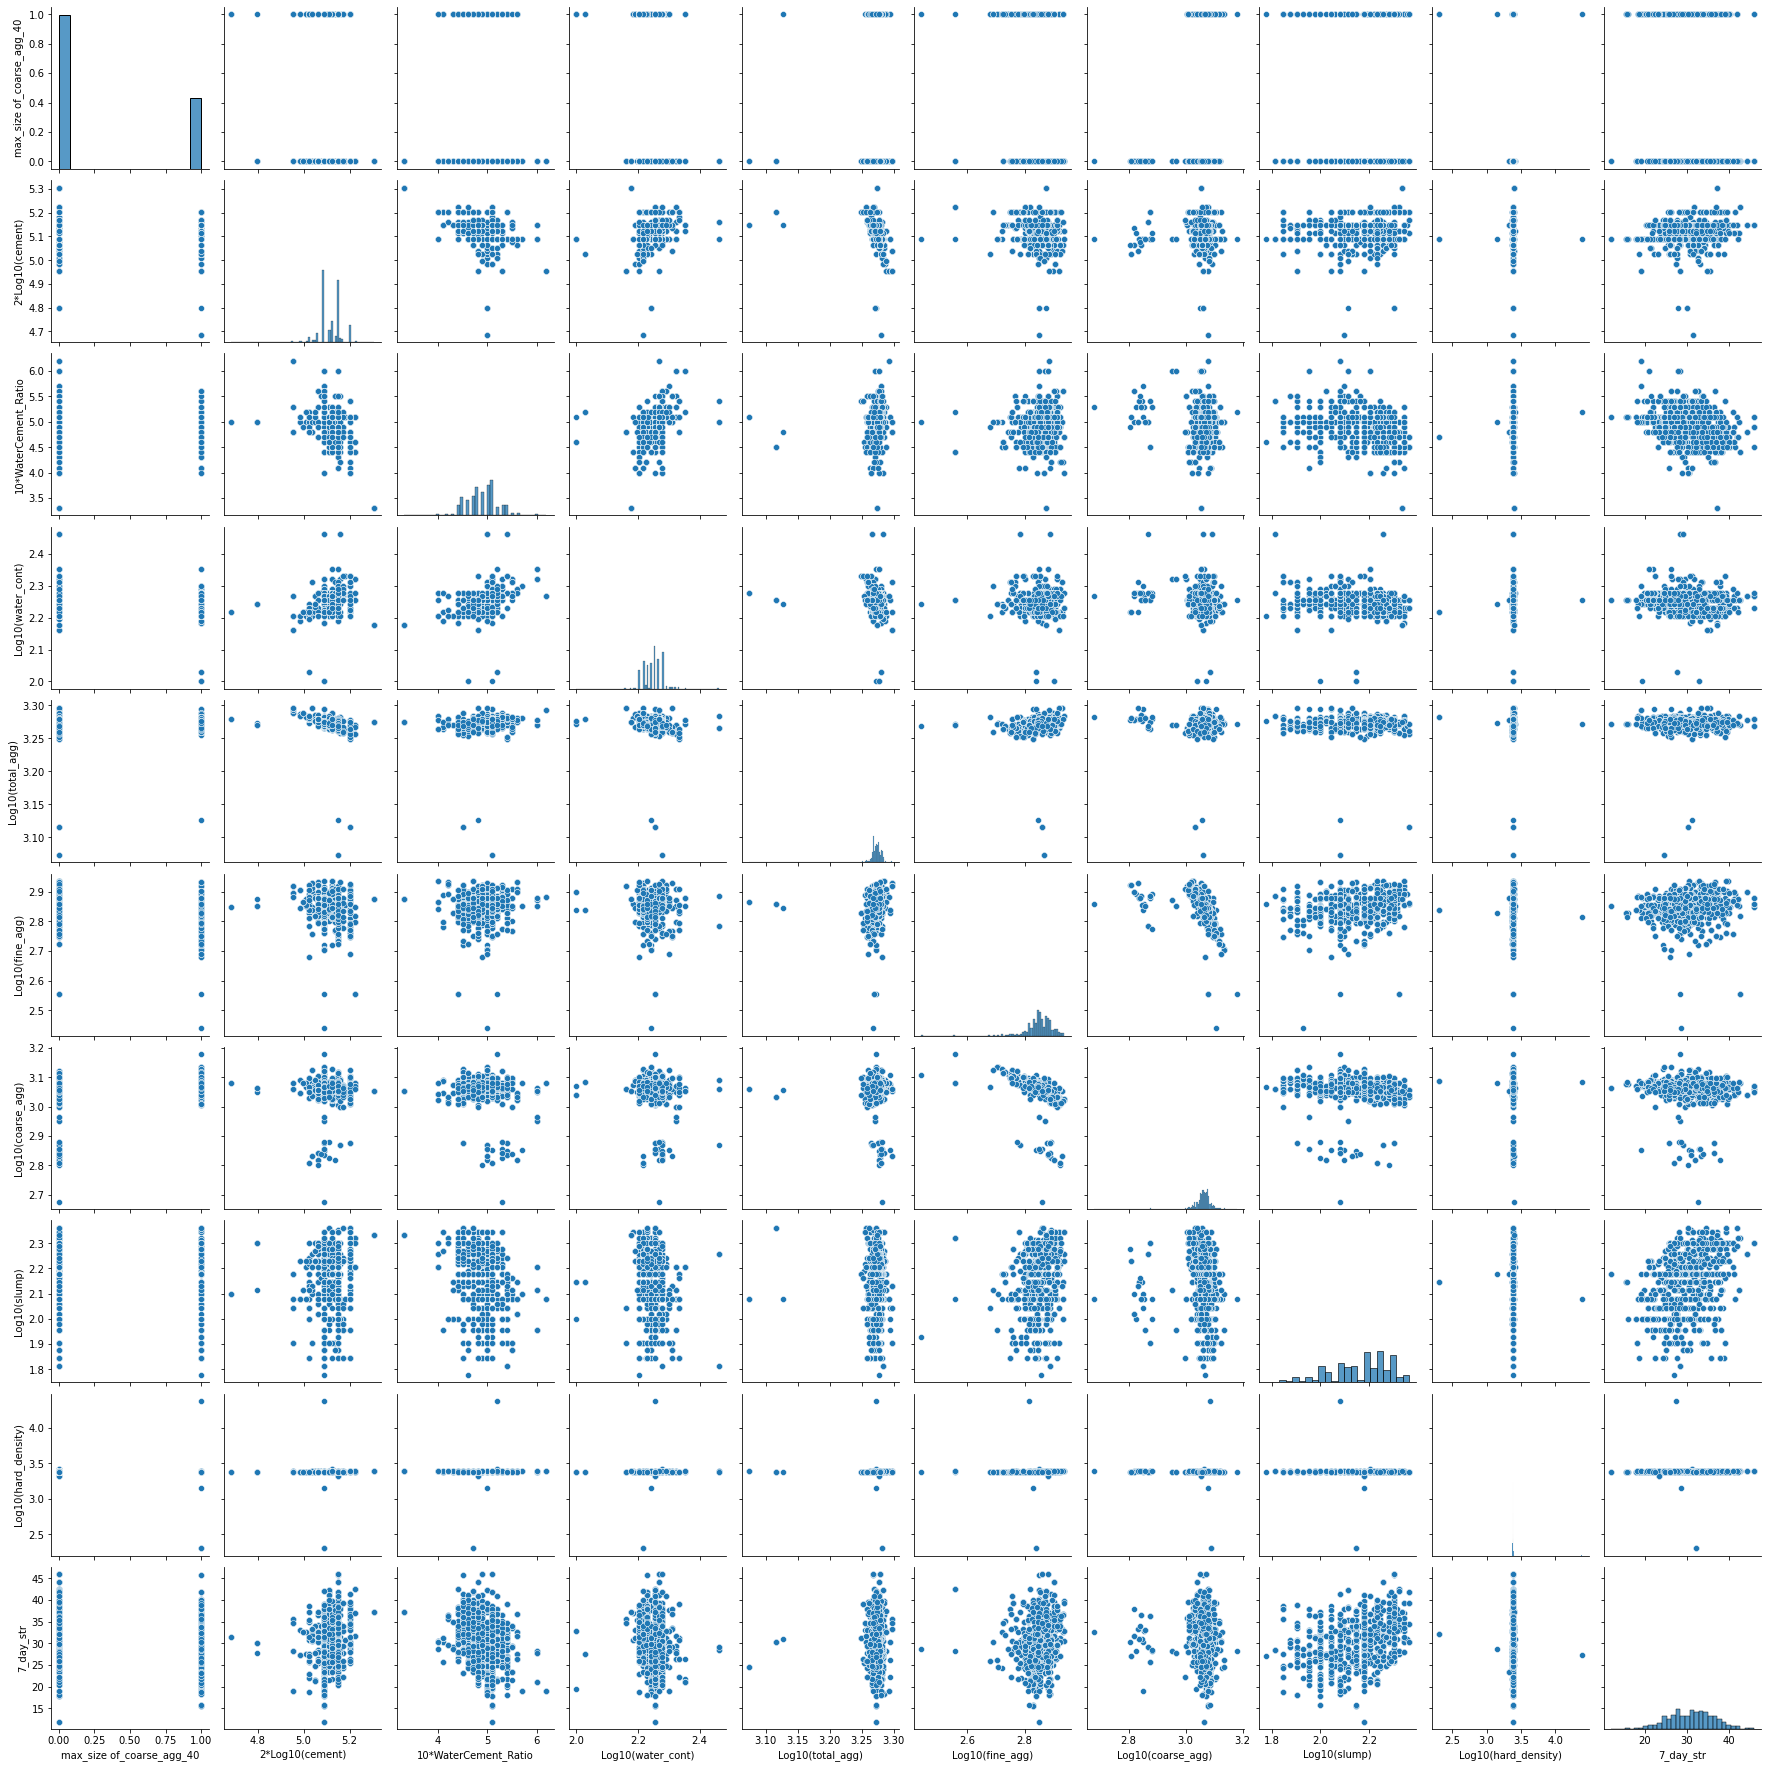

model.coef_ [-1.2168573  10.94587034 -3.6430513   3.52417068 56.03656319  3.95615869
 -4.19284313 11.80141756  1.12032048]
model.intercept_ -225.87441830357346
mean_squared_error(y_test,y_pred) 22.788709057307056
r2_score(y_test,y_pred) 0.23719971785875327


In [29]:
df=pd.read_csv("C:\\Users\\Andrew\\Downloads\\2500 Concrete design mixes3.csv")

sns.pairplot(df)
plt.show()

df.head()

X=df.iloc[:,2:-1]
y=df.iloc[:,-1]
X

from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

model=linear_model.LinearRegression()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("model.coef_",model.coef_)

print("model.intercept_",model.intercept_)

print("mean_squared_error(y_test,y_pred)",mean_squared_error(y_test,y_pred))

print("r2_score(y_test,y_pred)",r2_score(y_test,y_pred))

In [30]:
df.head()

Type_of_course_Aggregate Type_of_Fine_Aggregate_  max_size of_coarse_agg_40  \
0                  Crushed                 Natural                          1   
1                  Crushed                 Natural                          1   
2                  Crushed                 Natural                          0   
3                  Natural                 Natural                          0   
4                  Natural                 Natural                          0   

   2*Log10(cement)  10*WaterCement_Ratio  Log10(water_cont)  Log10(total_agg)  \
0         5.124586                   5.2           2.352183          3.271842   
1         5.124586                   5.2           2.352183          3.271842   
2         5.088136                   5.3           2.267172          3.282169   
3         5.062958                   4.9           2.217484          3.277609   
4         5.023767                   5.1           2.217484          3.281033   

   Log10(fine_agg)  Log10(coarse_agg)  Log10(slump)  Log10(hard_density)  \
0         2.851258           3.064458      2.204120             3.381476   
1         2.851258           3.064458      2.204120             3.380754   
2         2.860338           3.075547      2.079181             3.393575   
3         2.921686           3.025306      2.278754             3.382377   
4         2.924279           3.029384      2.230449             3.380934   

   7_day_str  
0       21.8  
1       26.3  
2       32.7  
3       30.3  
4       27.0

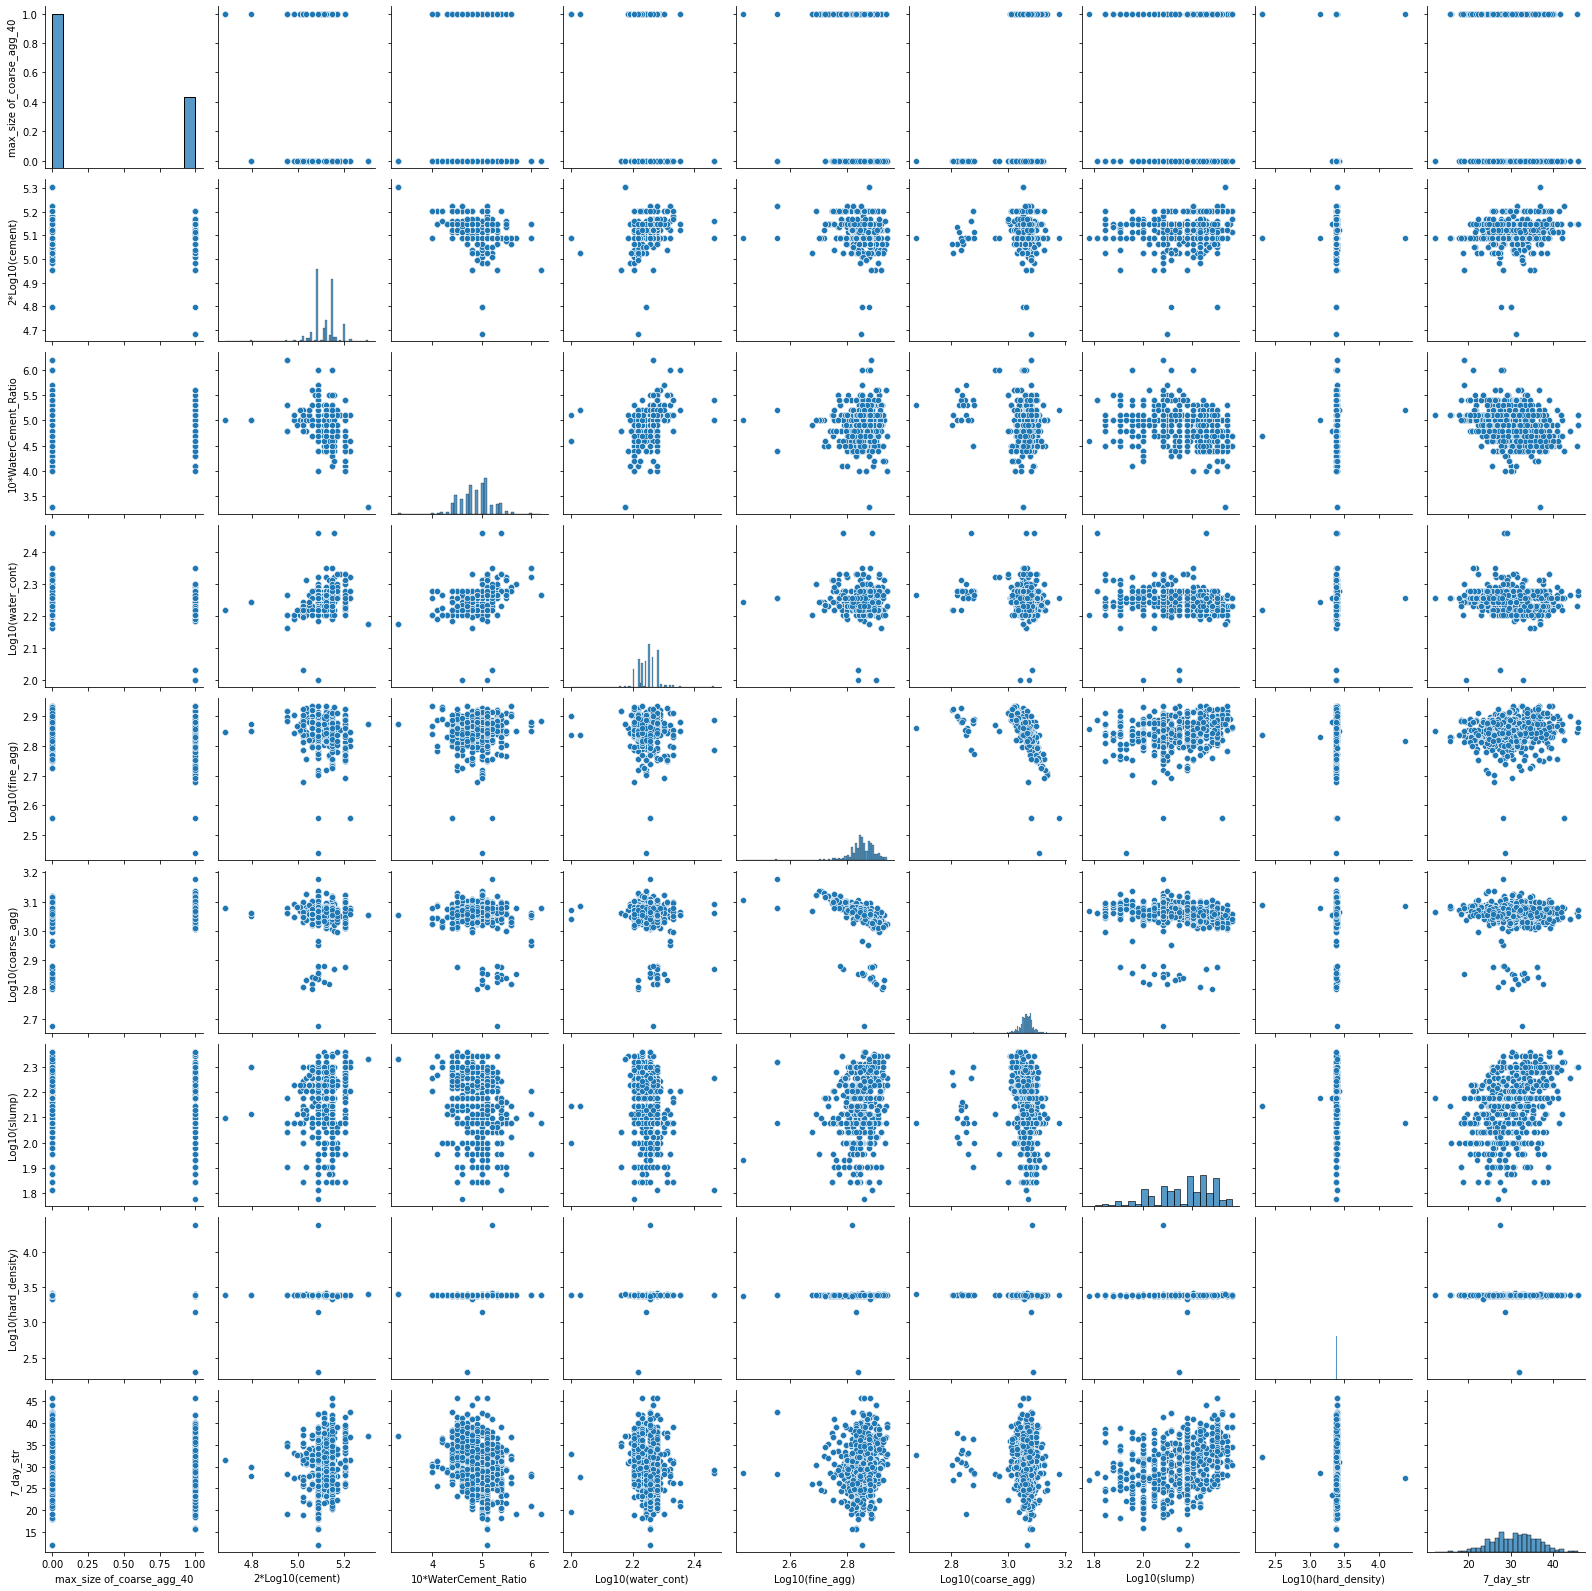

model.coef_ [-1.32769723  7.05807531 -3.52797641  2.13362894  7.20997305 -2.26248376
 11.78609653  1.27563682]
model.intercept_ -35.655495685365025
mean_squared_error(y_test,y_pred) 22.984371246776767
r2_score(y_test,y_pred) 0.23065037041846836


In [31]:
df=pd.read_csv("C:\\Users\\Andrew\\Downloads\\2500 Concrete design mixes4.csv")

sns.pairplot(df)
plt.show()

df.head()

X=df.iloc[:,2:-1]
y=df.iloc[:,-1]
X

from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

model=linear_model.LinearRegression()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("model.coef_",model.coef_)

print("model.intercept_",model.intercept_)

print("mean_squared_error(y_test,y_pred)",mean_squared_error(y_test,y_pred))

print("r2_score(y_test,y_pred)",r2_score(y_test,y_pred))

In [32]:
df.head()

Type_of_course_Aggregate Type_of_Fine_Aggregate_  max_size of_coarse_agg_40  \
0                  Crushed                 Natural                          1   
1                  Crushed                 Natural                          1   
2                  Crushed                 Natural                          0   
3                  Natural                 Natural                          0   
4                  Natural                 Natural                          0   

   2*Log10(cement)  10*WaterCement_Ratio  Log10(water_cont)  Log10(fine_agg)  \
0         5.124586                   5.2           2.352183         2.851258   
1         5.124586                   5.2           2.352183         2.851258   
2         5.088136                   5.3           2.267172         2.860338   
3         5.062958                   4.9           2.217484         2.921686   
4         5.023767                   5.1           2.217484         2.924279   

   Log10(coarse_agg)  Log10(slump)  Log10(hard_density)  7_day_str  
0           3.064458      2.204120             3.381476       21.8  
1           3.064458      2.204120             3.380754       26.3  
2           3.075547      2.079181             3.393575       32.7  
3           3.025306      2.278754             3.382377       30.3  
4           3.029384      2.230449             3.380934       27.0

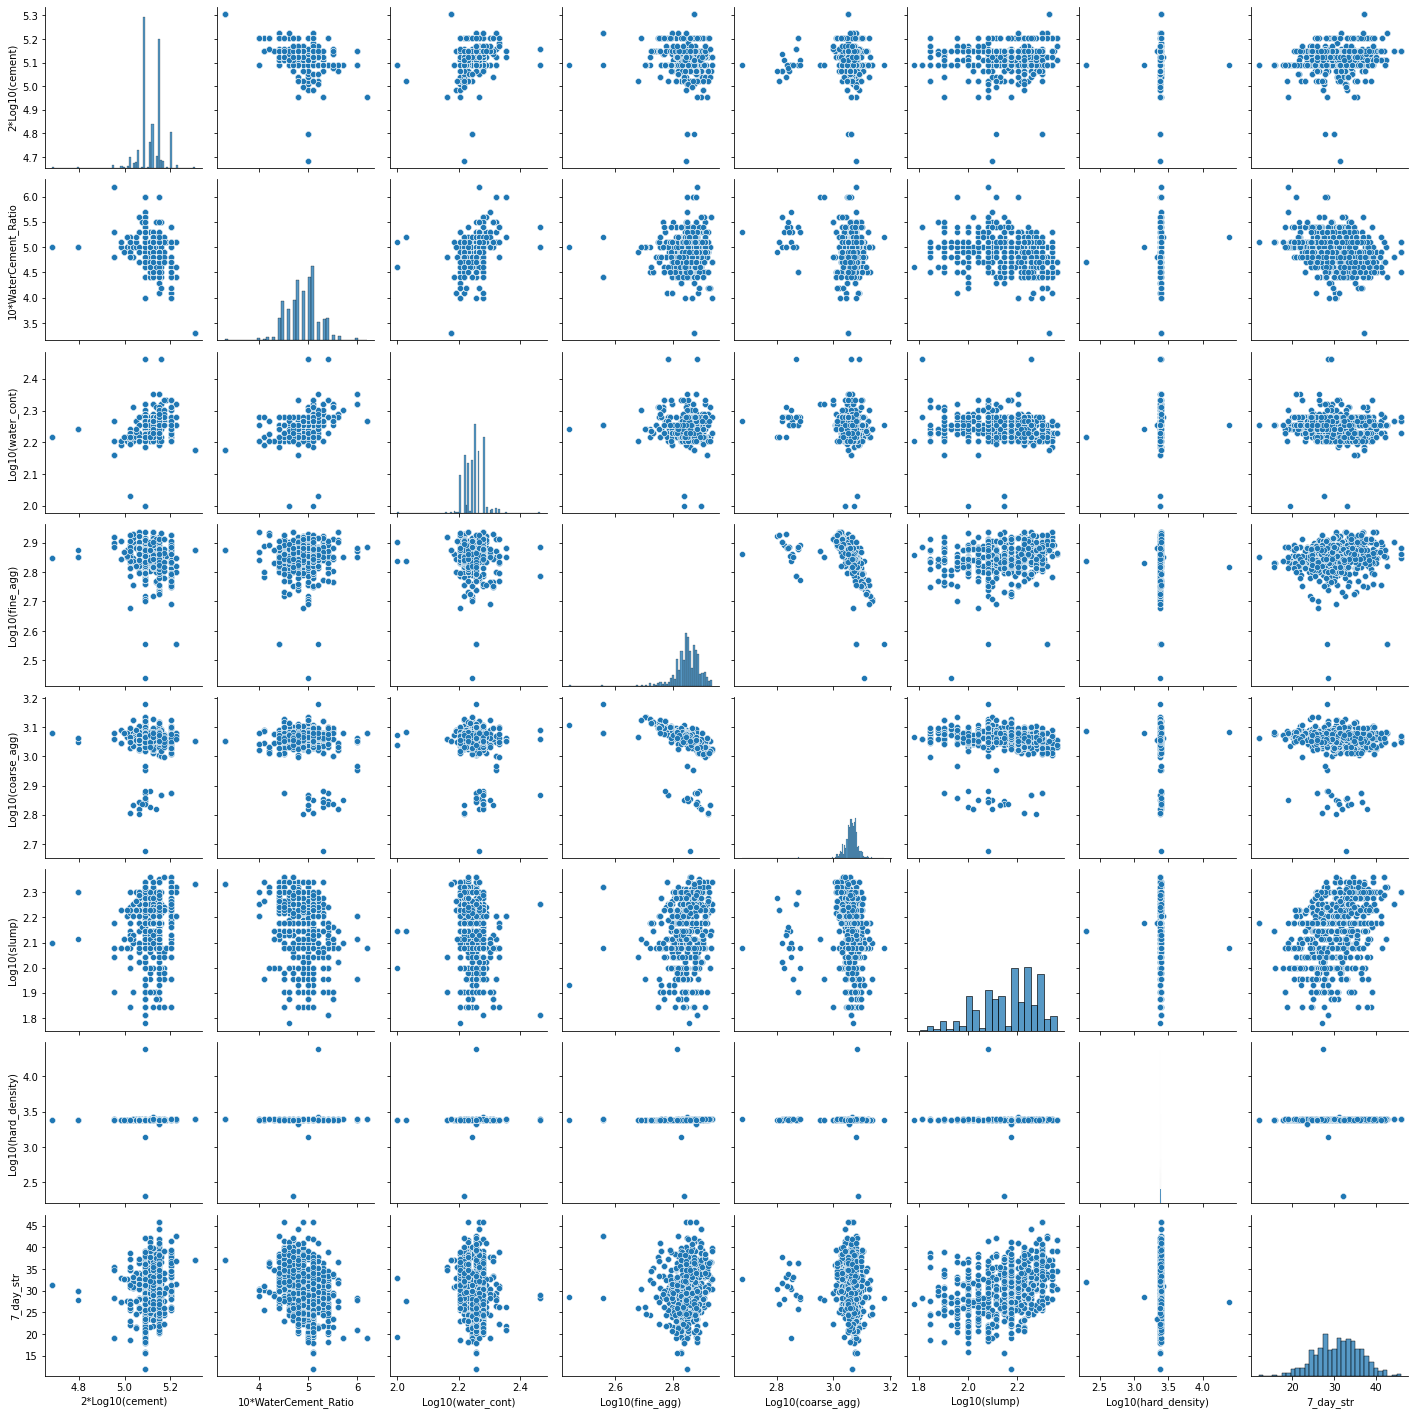

model.coef_ [ 9.12498303 -3.20860679  5.85819623 11.01710783 -2.83623939 12.71780969
  1.71429865]
model.intercept_ -69.19715091987906
mean_squared_error(y_test,y_pred) 23.00722821544275
r2_score(y_test,y_pred) 0.22988528530094543


In [33]:
df=pd.read_csv("C:\\Users\\Andrew\\Downloads\\2500 Concrete design mixes5.csv")

sns.pairplot(df)
plt.show()

df.head()

X=df.iloc[:,2:-1]
y=df.iloc[:,-1]
X

from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

model=linear_model.LinearRegression()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("model.coef_",model.coef_)

print("model.intercept_",model.intercept_)

print("mean_squared_error(y_test,y_pred)",mean_squared_error(y_test,y_pred))

print("r2_score(y_test,y_pred)",r2_score(y_test,y_pred))

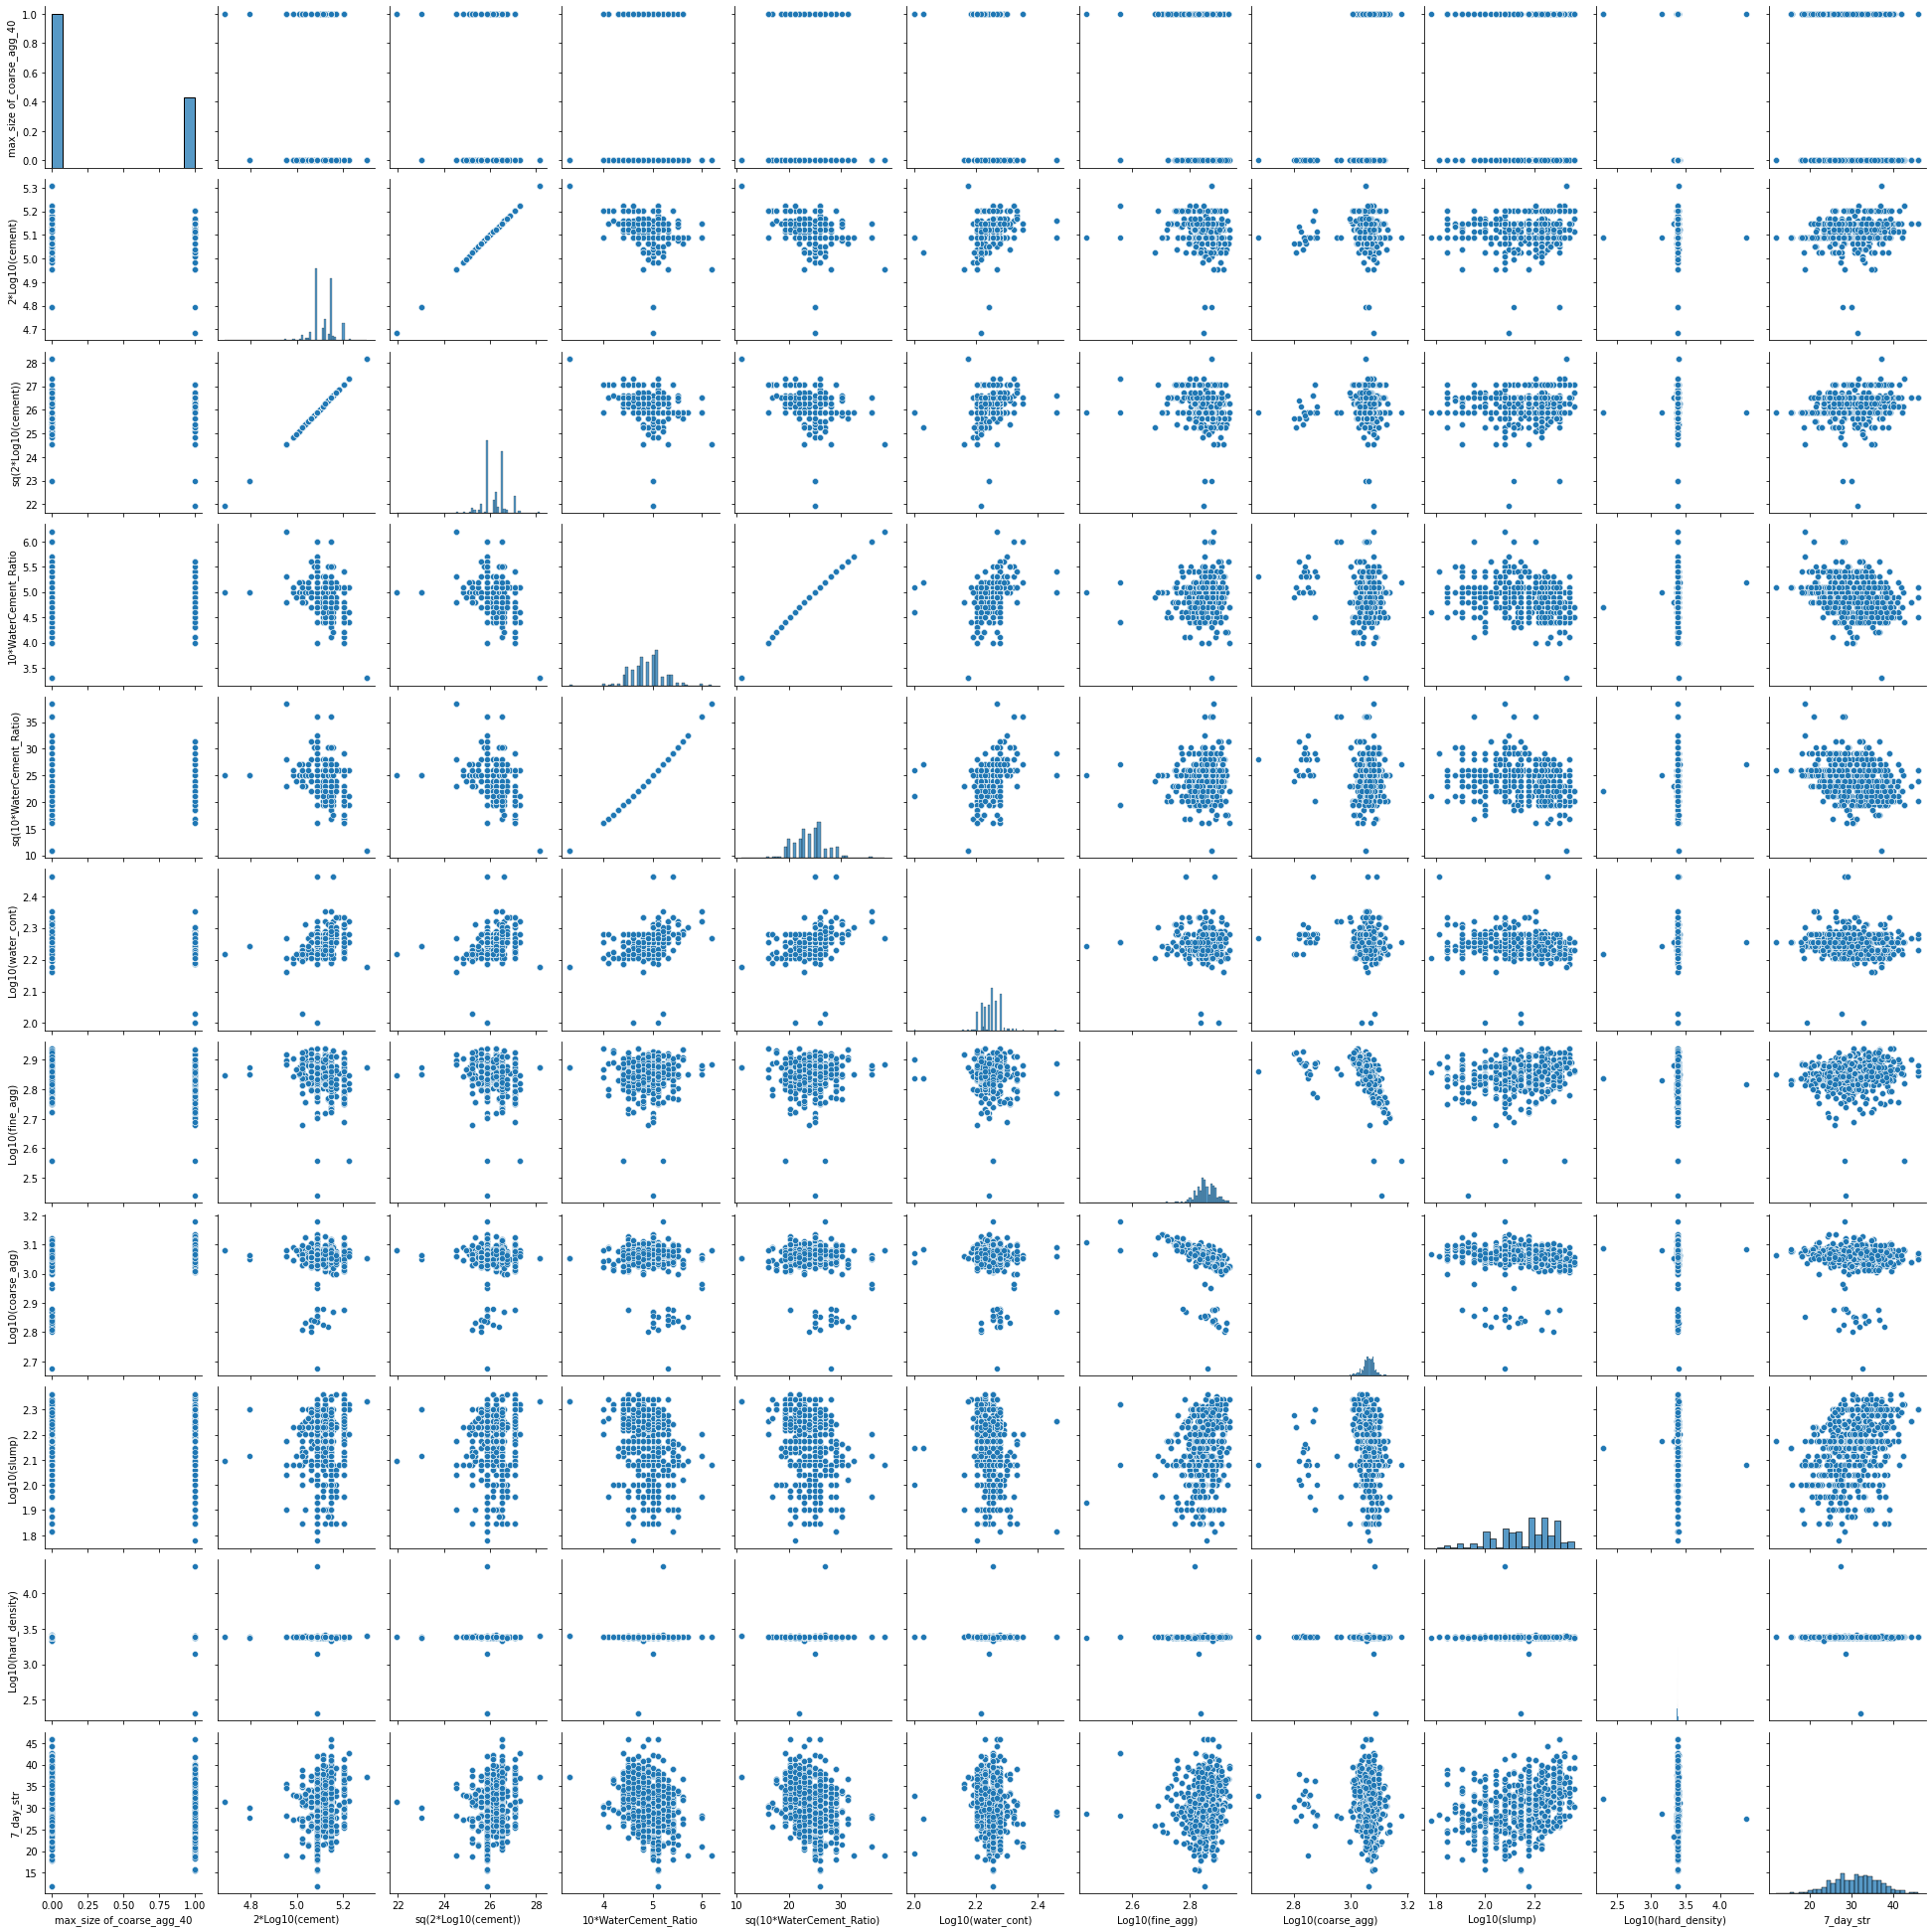

model.coef_ [  -1.28278685 -430.28114955   43.43276306   12.02586304   -1.50545267
   -4.28922379    8.08669661   -2.65829915   11.64628462    1.23067335]
model.intercept_ 1038.556626142697
mean_squared_error(y_test,y_pred) 22.68952480055657
r2_score(y_test,y_pred) 0.24051968560431458


In [34]:
df=pd.read_csv("C:\\Users\\Andrew\\Downloads\\2500 Concrete design mixes6.csv")

sns.pairplot(df)
plt.show()

df.head()

X=df.iloc[:,2:-1]
y=df.iloc[:,-1]
X

from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

model=linear_model.LinearRegression()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("model.coef_",model.coef_)

print("model.intercept_",model.intercept_)

print("mean_squared_error(y_test,y_pred)",mean_squared_error(y_test,y_pred))

print("r2_score(y_test,y_pred)",r2_score(y_test,y_pred))

In [35]:
df.head()

Type_of_course_Aggregate Type_of_Fine_Aggregate_  max_size of_coarse_agg_40  \
0                  Crushed                 Natural                          1   
1                  Crushed                 Natural                          1   
2                  Crushed                 Natural                          0   
3                  Natural                 Natural                          0   
4                  Natural                 Natural                          0   

   2*Log10(cement)  sq(2*Log10(cement))  10*WaterCement_Ratio  \
0         5.124586            26.261379                   5.2   
1         5.124586            26.261379                   5.2   
2         5.088136            25.889129                   5.3   
3         5.062958            25.633542                   4.9   
4         5.023767            25.238232                   5.1   

   sq(10*WaterCement_Ratio)  Log10(water_cont)  Log10(fine_agg)  \
0                     27.04           2.352183         2.851258   
1                     27.04           2.352183         2.851258   
2                     28.09           2.267172         2.860338   
3                     24.01           2.217484         2.921686   
4                     26.01           2.217484         2.924279   

   Log10(coarse_agg)  Log10(slump)  Log10(hard_density)  7_day_str  
0           3.064458      2.204120             3.381476       21.8  
1           3.064458      2.204120             3.380754       26.3  
2           3.075547      2.079181             3.393575       32.7  
3           3.025306      2.278754             3.382377       30.3  
4           3.029384      2.230449             3.380934       27.0

In [39]:
len(y_pred)

452

In [38]:
len(y_test)

452

In [45]:
df=pd.read_csv("C:\\Users\\Andrew\\Downloads\\2500 Concrete design mixes8.csv")
df.corr()

Passing_0.6_mm_Sieve_(%)  \
Passing_0.6_mm_Sieve_(%)                                      1.000000   
Target_Mean_Strength_(Npermm2)                               -0.575588   
Cement_O.P.C_(Kgperm3)                                       -0.404464   
WaterCement_Ratio                                             0.354068   
Water_Content_(Kgperm3)                                       0.001308   
Additive_Type_&_Dosage_(per100_kg_of_cement)                  0.585571   
Total_Aggregate_(Kgperm3)                                     0.102897   
Fine_Aggregate_(Kgperm3)                                     -0.061600   
Coarse_Aggregate_(Kgperm3)                                    0.065118   
Workability_Slump_(mm)                                       -0.163884   
Hardened_Concrete_Desnity_(avg.)                              0.034523   
7_day_str                                                    -0.254292   

                                              Target_Mean_Strength_(Npermm2)  \
Passing_0.6_mm_Sieve_(%)                                           -0.575588   
Target_Mean_Strength_(Npermm2)                                      1.000000   
Cement_O.P.C_(Kgperm3)                                              0.615502   
WaterCement_Ratio                                                  -0.011696   
Water_Content_(Kgperm3)                                             0.234430   
Additive_Type_&_Dosage_(per100_kg_of_cement)                       -0.420198   
Total_Aggregate_(Kgperm3)                                           0.357440   
Fine_Aggregate_(Kgperm3)                                            0.163214   
Coarse_Aggregate_(Kgperm3)                                          0.292203   
Workability_Slump_(mm)                                              0.247991   
Hardened_Concrete_Desnity_(avg.)                                    0.094513   
7_day_str                                                           0.311155   

                                              Cement_O.P.C_(Kgperm3)  \
Passing_0.6_mm_Sieve_(%)                                   -0.404464   
Target_Mean_Strength_(Npermm2)                              0.615502   
Cement_O.P.C_(Kgperm3)                                      1.000000   
WaterCement_Ratio                                           0.029771   
Water_Content_(Kgperm3)                                     0.500241   
Additive_Type_&_Dosage_(per100_kg_of_cement)               -0.373891   
Total_Aggregate_(Kgperm3)                                   0.367972   
Fine_Aggregate_(Kgperm3)                                    0.172579   
Coarse_Aggregate_(Kgperm3)                                  0.268187   
Workability_Slump_(mm)                                      0.226542   
Hardened_Concrete_Desnity_(avg.)                            0.120552   
7_day_str                                                   0.264652   

                                              WaterCement_Ratio  \
Passing_0.6_mm_Sieve_(%)                               0.354068   
Target_Mean_Strength_(Npermm2)                        -0.011696   
Cement_O.P.C_(Kgperm3)                                 0.029771   
WaterCement_Ratio                                      1.000000   
Water_Content_(Kgperm3)                                0.672700   
Additive_Type_&_Dosage_(per100_kg_of_cement)           0.188181   
Total_Aggregate_(Kgperm3)                              0.552644   
Fine_Aggregate_(Kgperm3)                               0.314009   
Coarse_Aggregate_(Kgperm3)                             0.241300   
Workability_Slump_(mm)                                -0.211244   
Hardened_Concrete_Desnity_(avg.)                       0.143088   
7_day_str                                             -0.076646   

                                              Water_Content_(Kgperm3)  \
Passing_0.6_mm_Sieve_(%)                                     0.001308   
Target_Mean_Strength_(Npermm2)                               0.234430   
Cement_O.P.C_(

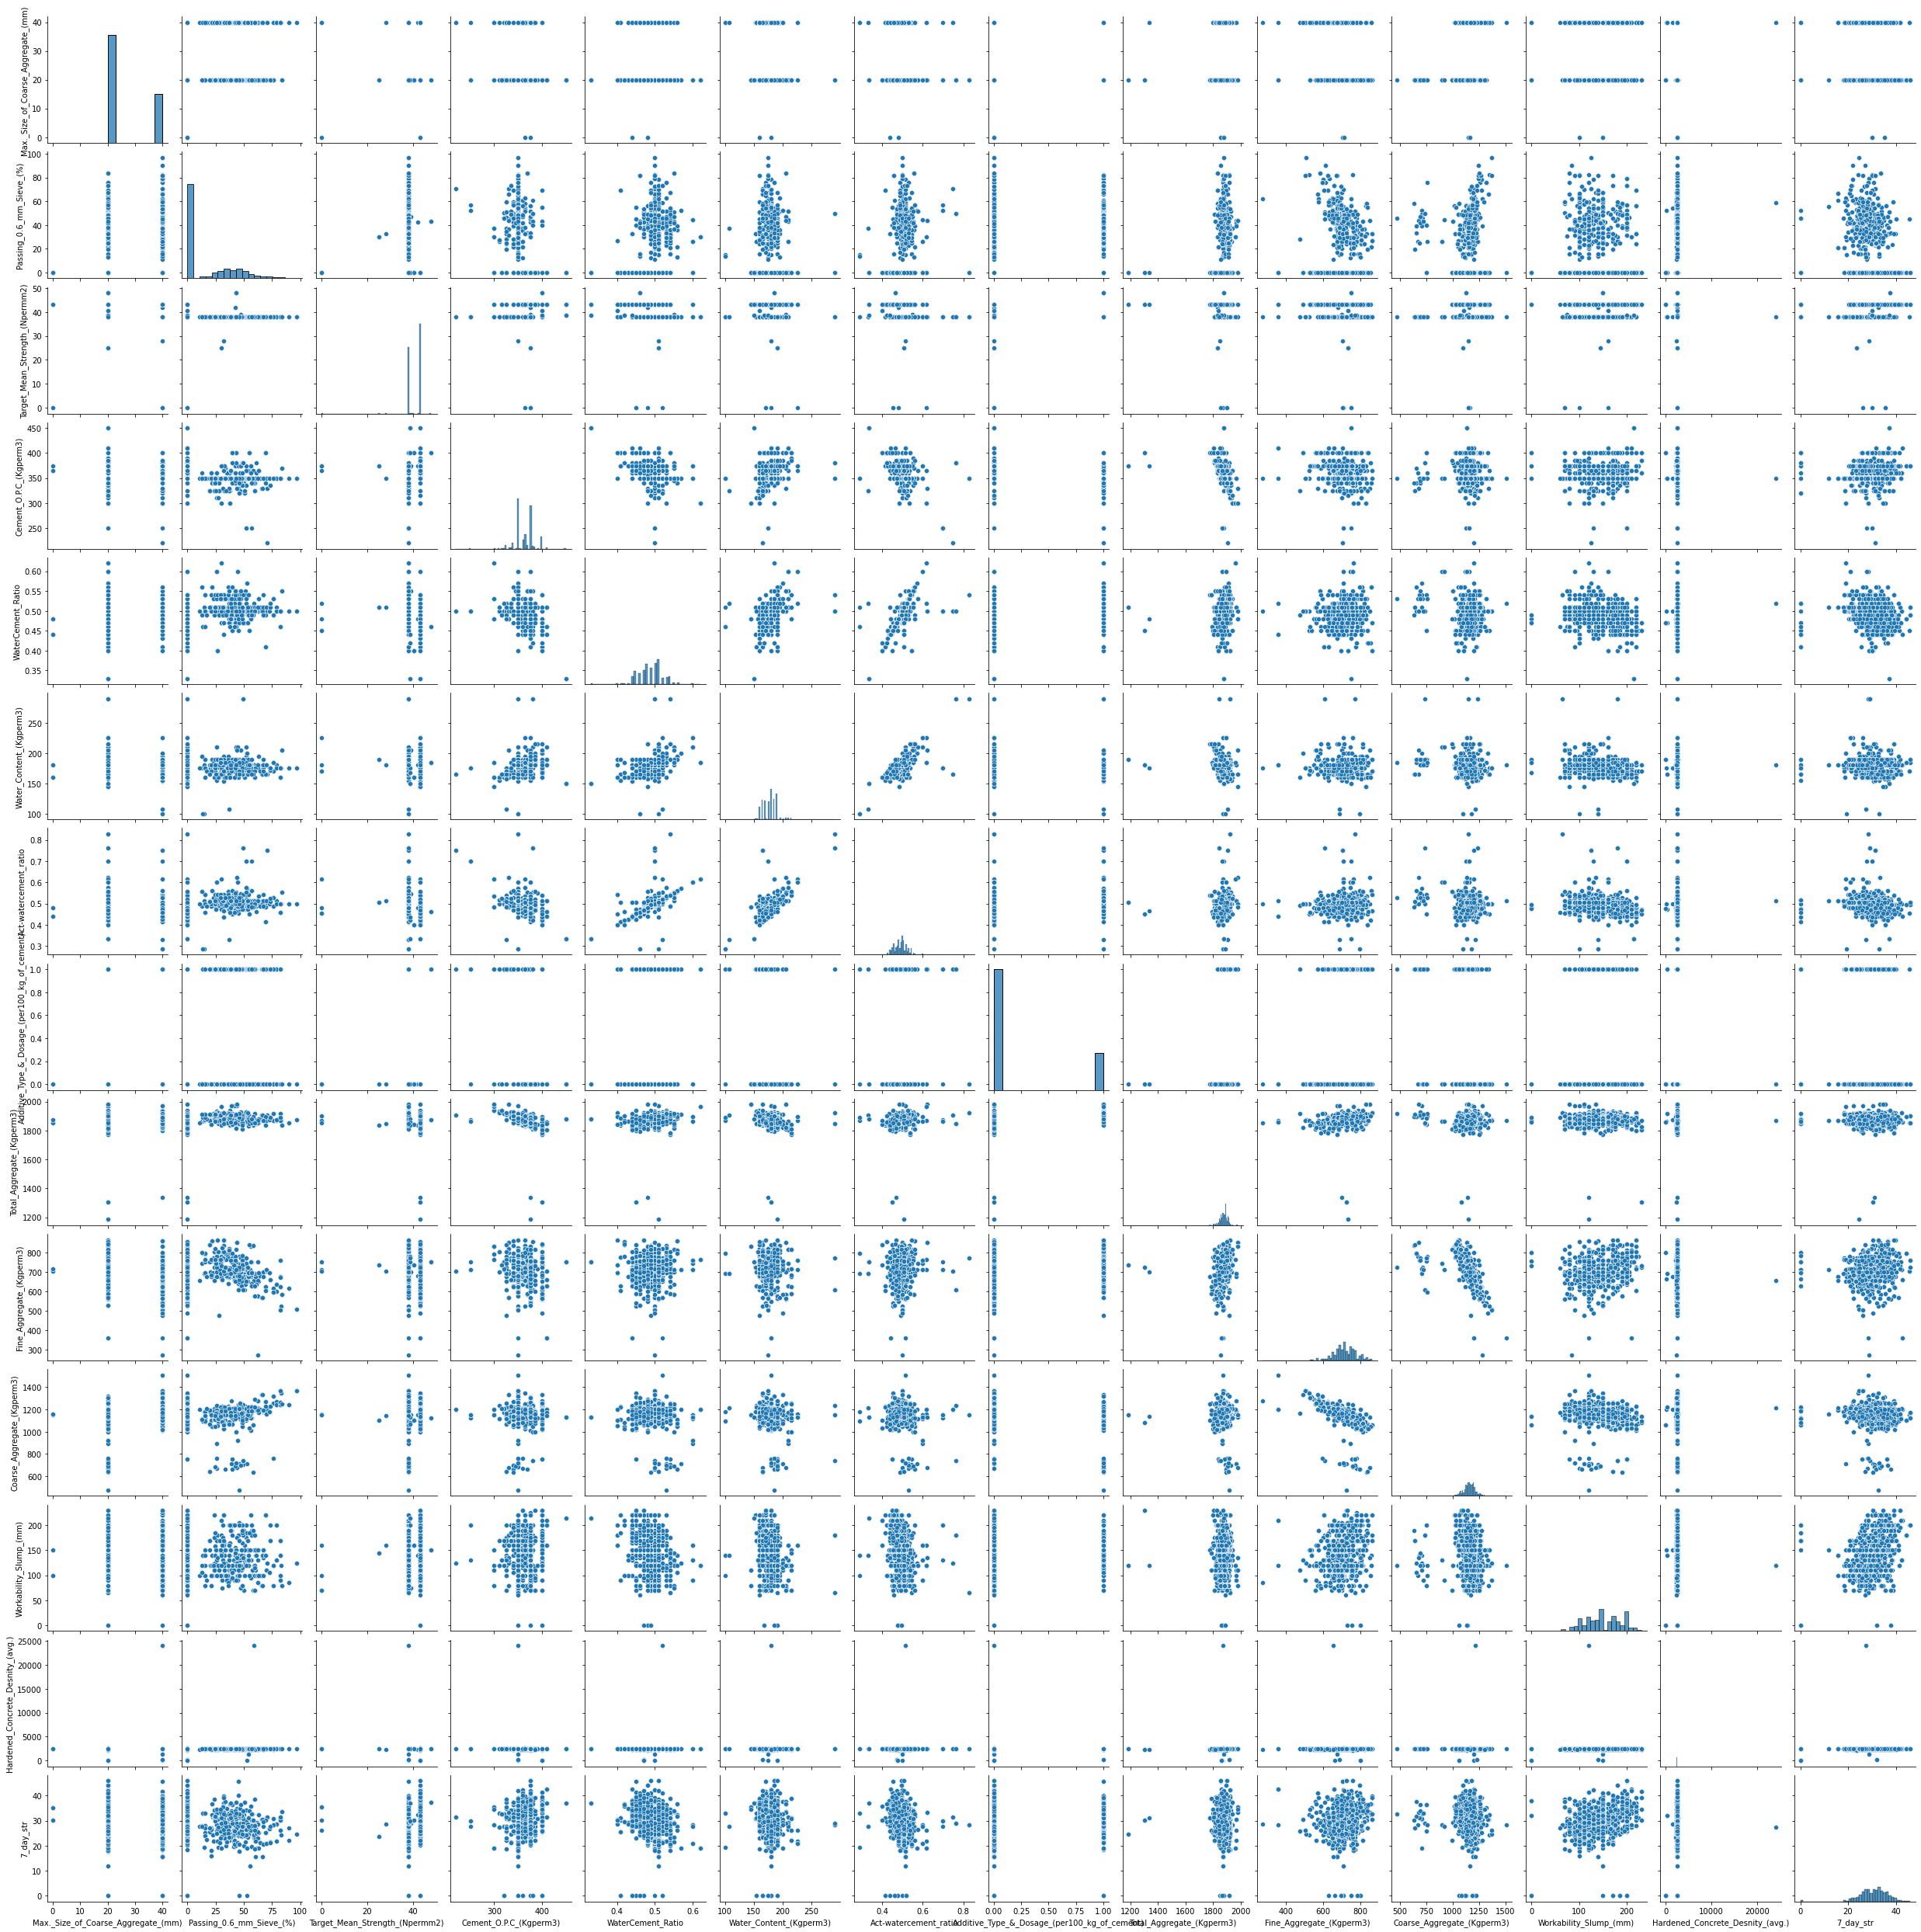

model.coef_ [-2.27260641e-02 -5.38541382e-02  1.71873229e-01 -1.84675785e-02
 -1.85344878e+01  8.89504985e-02 -2.40333919e+01  2.10907659e+00
  1.48585252e-02  4.94366982e-04 -3.06195003e-04  3.28458820e-02
  6.70367030e-04]
model.intercept_ 1.979060283447616
mean_squared_error(y_test,y_pred) 24.500302500823278
r2_score(y_test,y_pred) 0.22076813971239906


In [47]:
df=pd.read_csv("C:\\Users\\Andrew\\Downloads\\2500 Concrete design mixes8.csv")

sns.pairplot(df)
plt.show()

df.head()

X=df.iloc[:,2:-1]
y=df.iloc[:,-1]
X

from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

model=linear_model.LinearRegression()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("model.coef_",model.coef_)

print("model.intercept_",model.intercept_)

print("mean_squared_error(y_test,y_pred)",mean_squared_error(y_test,y_pred))

print("r2_score(y_test,y_pred)",r2_score(y_test,y_pred))

In [48]:
df.head()

Type_of_course_Aggregate Type_of_Fine_Aggregate_  \
0                  Crushed                 Natural   
1                  Crushed                 Natural   
2                  Crushed                 Natural   
3                  Natural                 Natural   
4                  Natural                 Natural   

   Max._Size_of_Coarse_Aggregate_(mm)  Passing_0.6_mm_Sieve_(%)  \
0                                  40                       0.0   
1                                  40                       0.0   
2                                  20                      45.6   
3                                  20                      57.9   
4                                  20                      19.5   

   Target_Mean_Strength_(Npermm2)  Cement_O.P.C_(Kgperm3)  WaterCement_Ratio  \
0                            43.0                     365               0.52   
1                             0.0                     365               0.52   
2                            38.0                     350               0.53   
3                            38.0                     340               0.49   
4                            38.0                     325               0.51   

   Water_Content_(Kgperm3)  Act-watercement_ratio  \
0                      225               0.616438   
1                      225               0.616438   
2                      185               0.528571   
3                      165               0.485294   
4                      165               0.507692   

   Additive_Type_&_Dosage_(per100_kg_of_cement)  Total_Aggregate_(Kgperm3)  \
0                                             0                       1870   
1                                             0                       1870   
2                                             1                       1915   
3                                             1                       1895   
4                                             1                       1910   

   Fine_Aggregate_(Kgperm3)  Coarse_Aggregate_(Kgperm3)  \
0                       710                        1160   
1                       710                        1160   
2                       725                        1190   
3                       835                        1060   
4                       840                        1070   

   Workability_Slump_(mm)  Hardened_Concrete_Desnity_(avg.)  7_day_str  
0                     160                            2407.0       21.8  
1                     160                            2403.0       26.3  
2                     120                            2475.0       32.7  
3                     190                            2412.0       30.3  
4                     170                            2404.0       27.0

In [50]:
df=pd.read_csv("C:\\Users\\Andrew\\Downloads\\2500 Concrete design mixes10.csv")
df.corr()

Max._Size_of_Coarse_Aggregate_(mm)  \
Max._Size_of_Coarse_Aggregate_(mm)                                      1.000000   
Passing_0.6_mm_Sieve_(%)                                                0.076015   
Target_Mean_Strength_(Npermm2)                                         -0.073847   
Cement_O.P.C_(Kgperm3)                                                 -0.146535   
WaterCement_Ratio                                                      -0.176106   
Water_Content_(Kgperm3)                                                -0.311307   
Act-watercement_ratio                                                  -0.184739   
Additive_Type_&_Dosage_(per100_kg_of_cement)                           -0.034860   
Total_Aggregate_(Kgperm3)                                              -0.069570   
Fine_Aggregate_(Kgperm3)                                               -0.320764   
Coarse_Aggregate_(Kgperm3)                                              0.238305   
Workability_Slump_(mm)                                                 -0.155012   
Hardened_Concrete_Desnity_(avg.)                                       -0.070488   
7_day_str                                                              -0.120811   

                                              Passing_0.6_mm_Sieve_(%)  \
Max._Size_of_Coarse_Aggregate_(mm)                            0.076015   
Passing_0.6_mm_Sieve_(%)                                      1.000000   
Target_Mean_Strength_(Npermm2)                               -0.675908   
Cement_O.P.C_(Kgperm3)                                       -0.523073   
WaterCement_Ratio                                             0.398475   
Water_Content_(Kgperm3)                                      -0.015596   
Act-watercement_ratio                                         0.364409   
Additive_Type_&_Dosage_(per100_kg_of_cement)                  0.583782   
Total_Aggregate_(Kgperm3)                                     0.145439   
Fine_Aggregate_(Kgperm3)                                     -0.083076   
Coarse_Aggregate_(Kgperm3)                                    0.026850   
Workability_Slump_(mm)                                       -0.183428   
Hardened_Concrete_Desnity_(avg.)                             -0.015894   
7_day_str                                                    -0.277019   

                                              Target_Mean_Strength_(Npermm2)  \
Max._Size_of_Coarse_Aggregate_(mm)                                 -0.073847   
Passing_0.6_mm_Sieve_(%)                                           -0.675908   
Target_Mean_Strength_(Npermm2)                                      1.000000   
Cement_O.P.C_(Kgperm3)                                              0.456438   
WaterCement_Ratio                                                  -0.368125   
Water_Content_(Kgperm3)                                             0.002681   
Act-watercement_ratio                                              -0.335458   
Additive_Type_&_Dosage_(per100_kg_of_cement)                       -0.492953   
Total_Aggregate_(Kgperm3)                                          -0.156749   
Fine_Aggregate_(Kgperm3)                                           -0.053590   
Coarse_Aggregate_(Kgperm3)                                          0.061426   
Workability_Slump_(mm)                                              0.218181   
Hardened_Concrete_Desnity_(avg.)                                    0.033139   
7_day_str                                                           0.254982   

                                              Cement_O.P.C_(Kgperm3)  \
Max._Size_of_Coarse_Aggregate_(mm)                         -0.146535   
Passing_0.6_mm_Sieve_(%)                                   -0.523073   
Target_Mean_Strength_(Npermm2)                              0.456438   
Cement_O.P.C_(Kgperm3)                                      1.000000   
WaterCement_Ratio                                          -0.412724   
Water_Content_(Kgperm3)                  

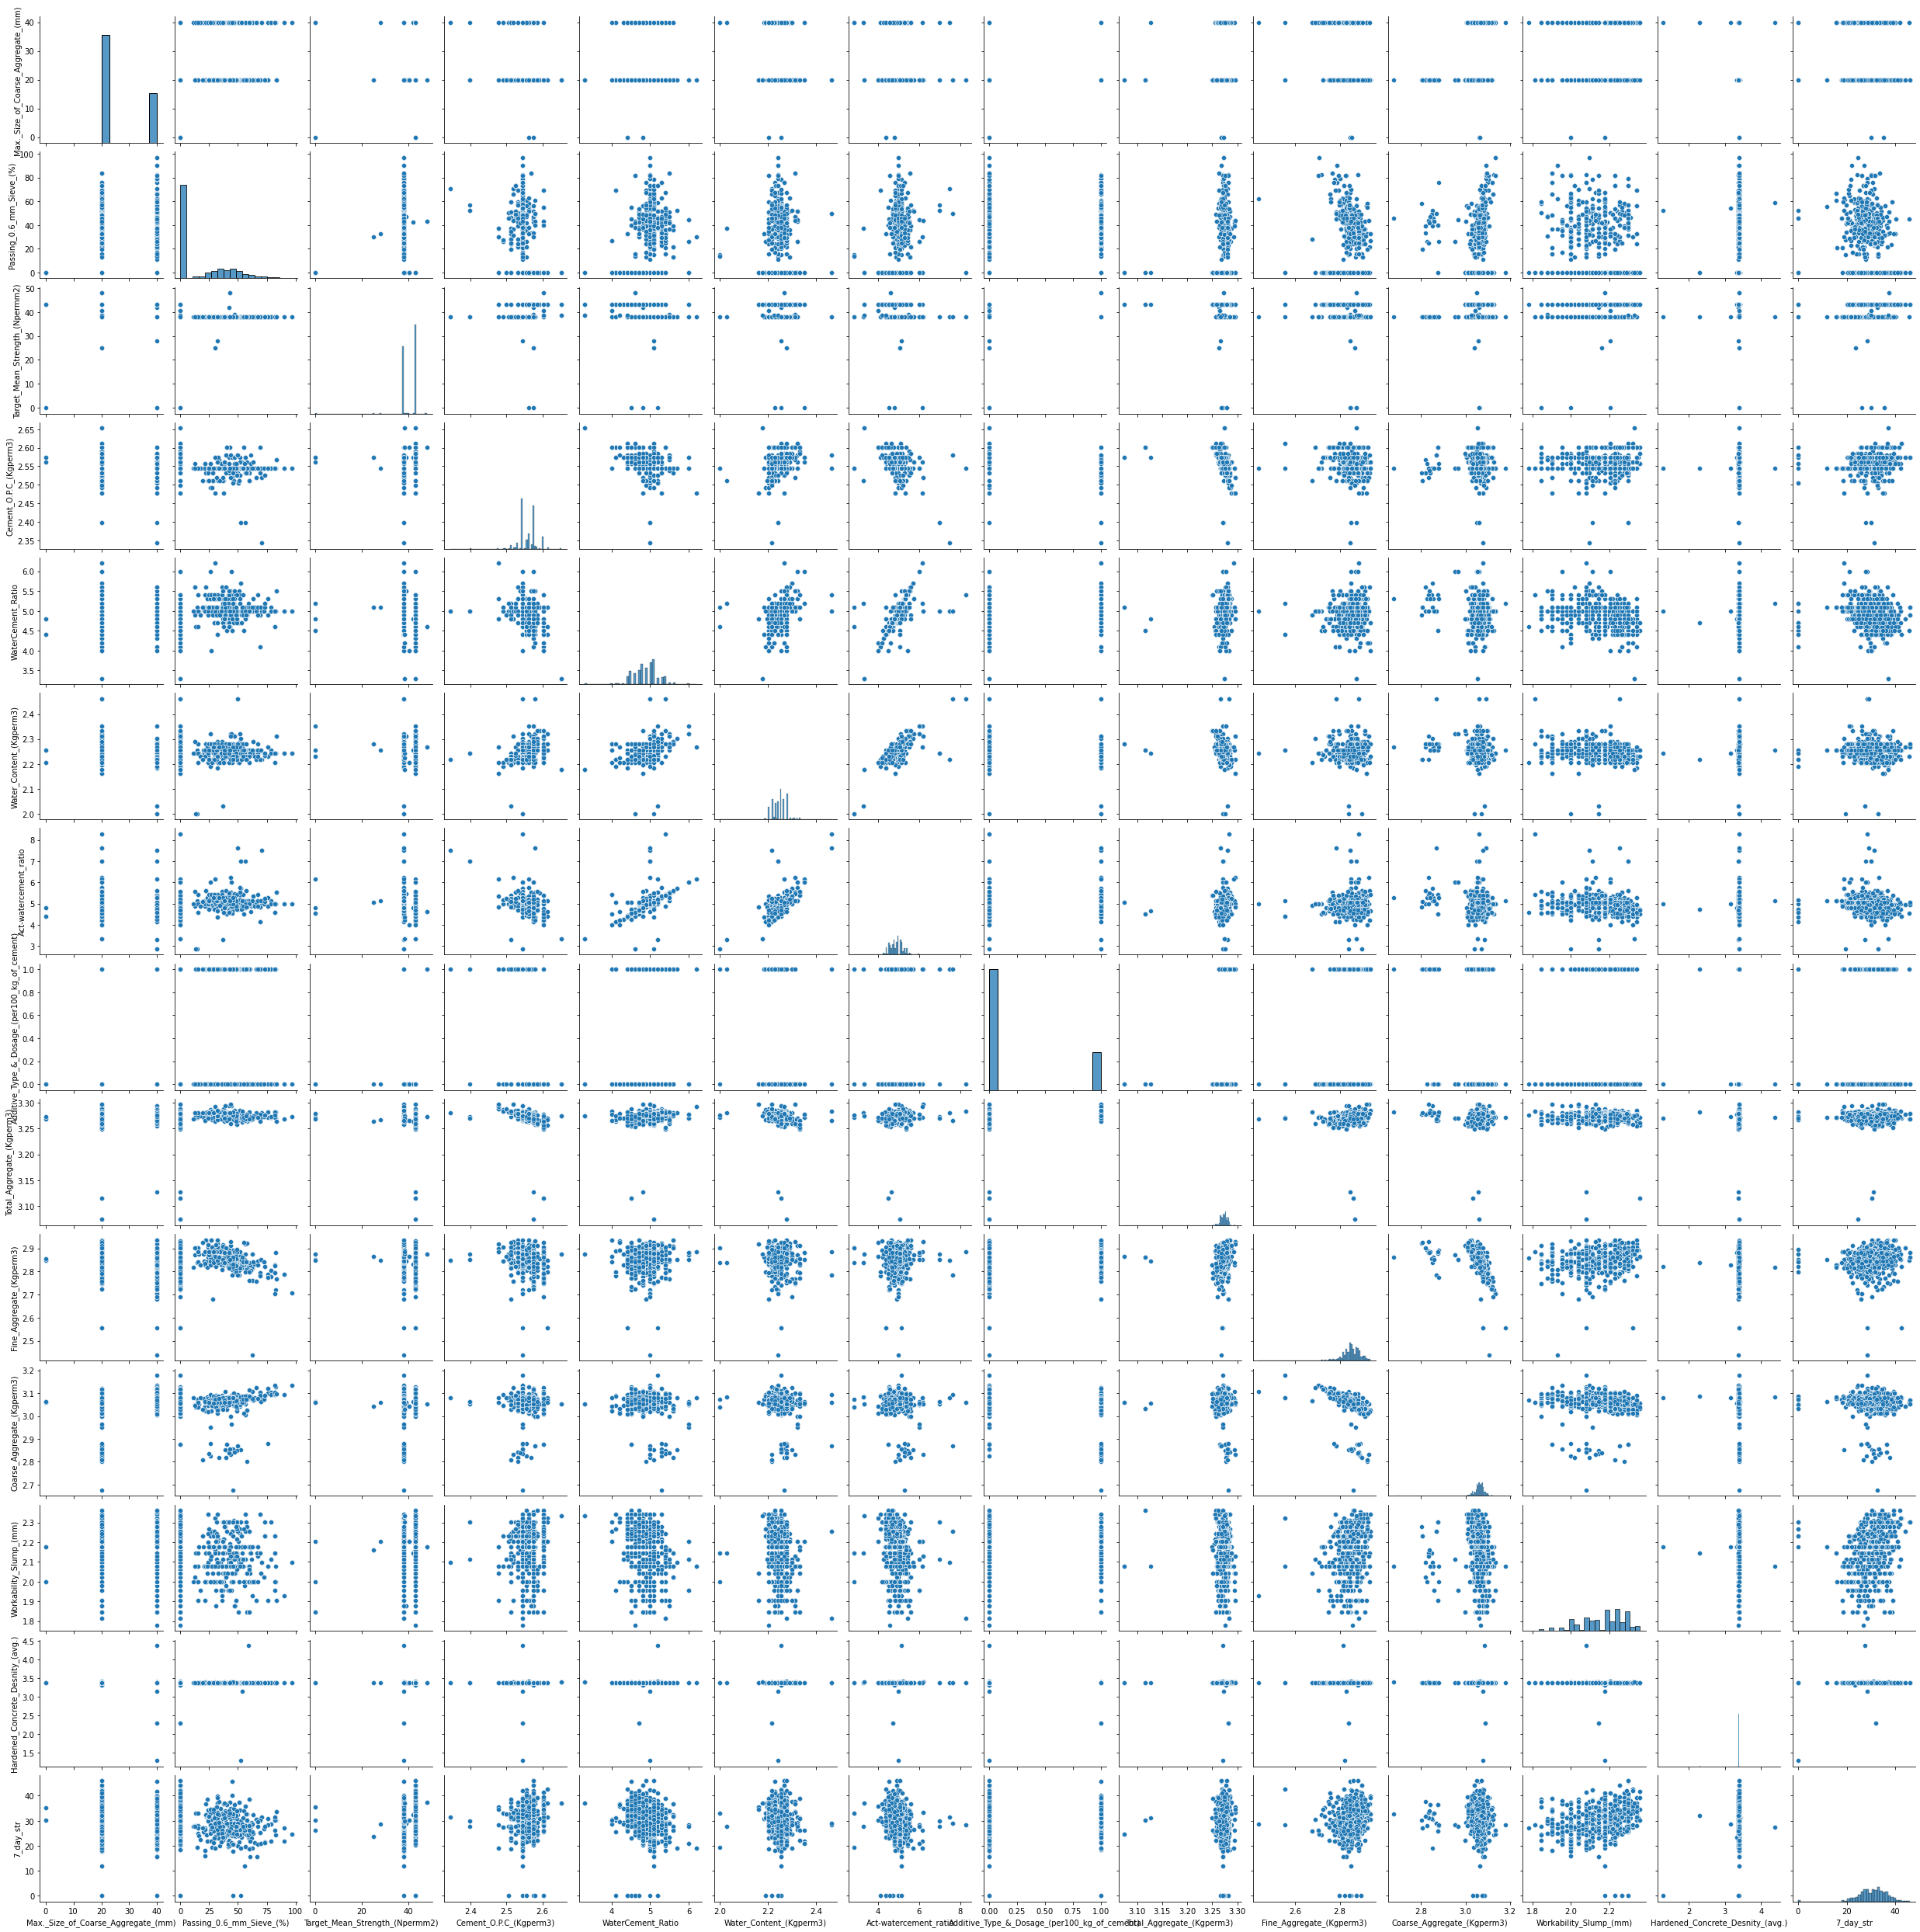

model.coef_ [-3.16990064e-02 -4.43079124e-02  3.11781256e-01 -3.12111692e+01
 -2.87859845e+00  4.88761897e+01 -3.28340451e+00  2.63682613e+00
  4.84200039e+01  3.29712492e+00 -5.04455219e+00  7.73899974e+00
  7.97679140e+00]
model.intercept_ -177.00282349087087
mean_squared_error(y_test,y_pred) 34.08342566978985
r2_score(y_test,y_pred) 0.12366357148926932


In [53]:
df=pd.read_csv("C:\\Users\\Andrew\\Downloads\\2500 Concrete design mixes10.csv")

sns.pairplot(df)
plt.show()

df.head()

X=df.iloc[:,2:-1]
y=df.iloc[:,-1]
X

from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=linear_model.LinearRegression()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("model.coef_",model.coef_)

print("model.intercept_",model.intercept_)

print("mean_squared_error(y_test,y_pred)",mean_squared_error(y_test,y_pred))

print("r2_score(y_test,y_pred)",r2_score(y_test,y_pred))

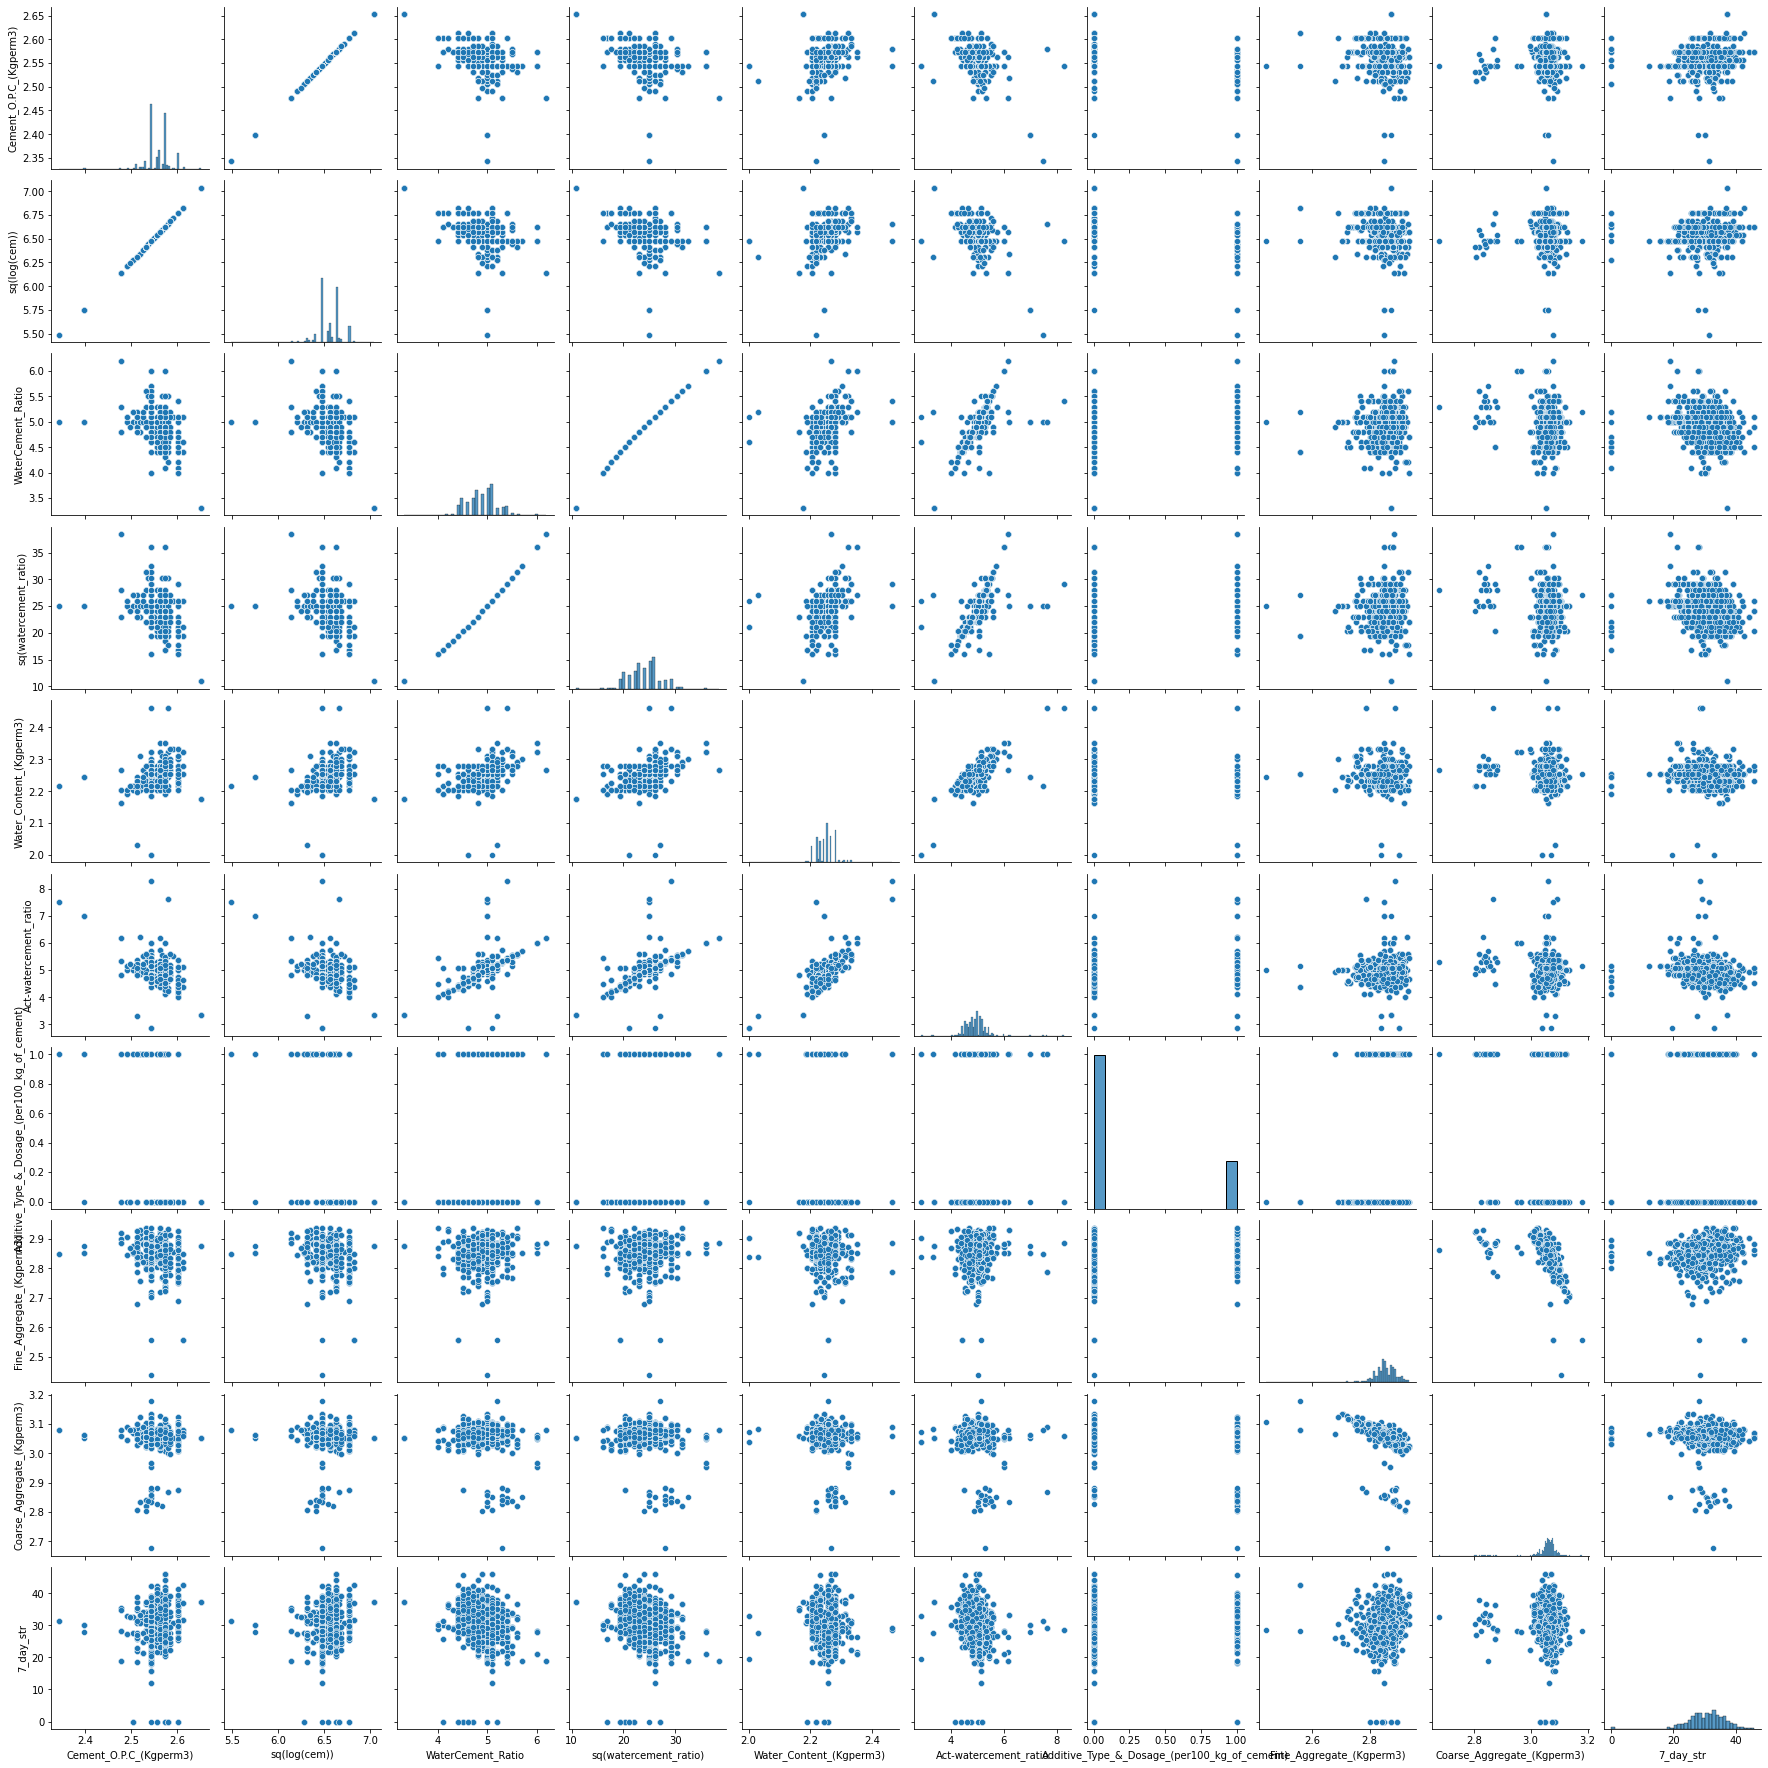

model.coef_ [-1.14452542e+03  2.28058217e+02  1.77425298e+01 -2.21342297e+00
  3.25852563e+01 -2.34452803e+00  1.64426026e+00  1.95756227e+01
  4.13646398e-01]
model.intercept_ 1313.18156017912
mean_squared_error(y_test,y_pred) 33.202135040411854
r2_score(y_test,y_pred) 0.0779052259437778


In [57]:
df=pd.read_csv("C:\\Users\\Andrew\\Downloads\\2500 Concrete design mixes11.csv")

sns.pairplot(df)
plt.show()

df.head()

X=df.iloc[:,2:-1]
y=df.iloc[:,-1]
X

from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=linear_model.LinearRegression()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("model.coef_",model.coef_)

print("model.intercept_",model.intercept_)

print("mean_squared_error(y_test,y_pred)",mean_squared_error(y_test,y_pred))

print("r2_score(y_test,y_pred)",r2_score(y_test,y_pred))

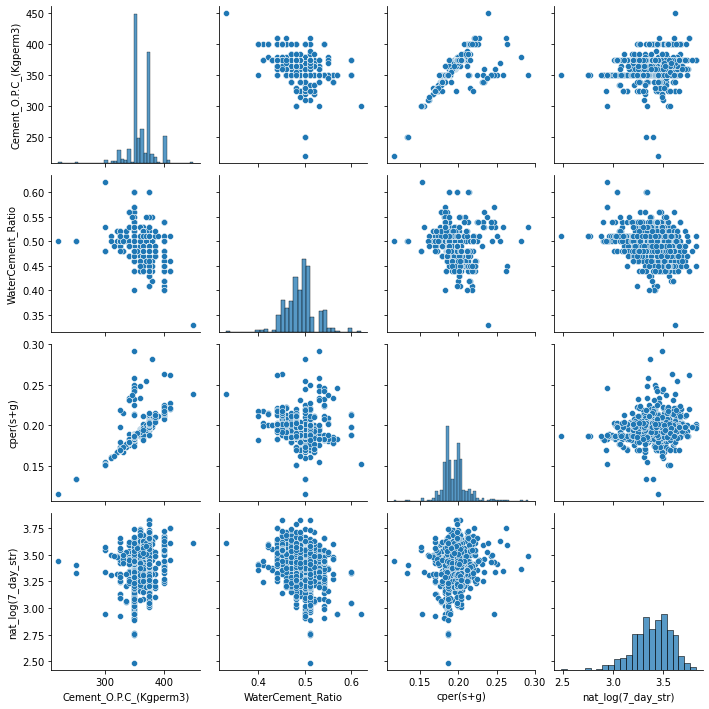

model.coef_ [ 7.20382224e-04 -1.55841707e+00  2.86985883e-01]
model.intercept_ 3.8453562201835916
mean_squared_error(y_test,y_pred) 0.03713370453546475
r2_score(y_test,y_pred) 0.10211682831470303


In [299]:
df=pd.read_csv("C:\\Users\\Andrew\\Downloads\\2500 Concrete design mixes12.csv")

sns.pairplot(df)
plt.show()

df.head()

X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X

from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=linear_model.LinearRegression()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("model.coef_",model.coef_)

print("model.intercept_",model.intercept_)

print("mean_squared_error(y_test,y_pred)",mean_squared_error(y_test,y_pred))

print("r2_score(y_test,y_pred)",r2_score(y_test,y_pred))

In [300]:
y1=np.exp(y_test)
y2=np.exp(y_pred)
y1,y2

(66     28.000063
 634    36.400088
 629    22.300047
 648    25.800056
 616    40.900102
          ...    
 236    25.100054
 418    30.000069
 355    24.500053
 618    41.100103
 608    32.500076
 Name: nat_log(7_day_str), Length: 133, dtype: float64,
 array([29.85839963, 34.4782429 , 31.05336391, 30.60262774, 30.69963489,
        29.14502365, 31.27825907, 29.30621268, 32.39159521, 28.1811075 ,
        30.49427921, 29.31656406, 27.36408218, 28.92080564, 28.61510761,
        30.2406039 , 29.35834595, 29.38800433, 31.91333703, 29.14080436,
        28.03686954, 30.01675581, 28.65776275, 31.29216113, 30.48925709,
        30.22945659, 32.97729873, 28.6860582 , 27.34500327, 29.58578048,
        27.77832433, 30.92020703, 29.14926631, 27.45736992, 31.56706657,
        29.14502365, 29.31513761, 28.47359264, 28.6860582 , 29.14502365,
        33.46043945, 29.10385091, 30.22945659, 29.30621268, 32.2185488 ,
        30.69963489, 25.46718995, 30.04875561, 30.22945659, 30.76658081,
        28.73385

In [302]:
print(np.sqrt(mean_squared_error(y1,y2)))
r2_score(y1,y2)

5.420651543640828


0.11013164089186755

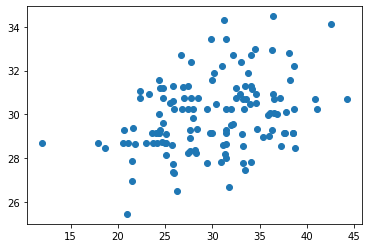

In [303]:
plt.scatter(y1,y2)

In [274]:
df.corr()

Cement_O.P.C_(Kgperm3)  WaterCement_Ratio  cper(s+g)  \
Cement_O.P.C_(Kgperm3)                1.000000          -0.385392   0.729869   
WaterCement_Ratio                    -0.385392           1.000000  -0.197810   
cper(s+g)                             0.729869          -0.197810   1.000000   
nat_log(7_day_str)                    0.215519          -0.309738   0.155505   

                        nat_log(7_day_str)  
Cement_O.P.C_(Kgperm3)            0.215519  
WaterCement_Ratio                -0.309738  
cper(s+g)                         0.155505  
nat_log(7_day_str)                1.000000

In [56]:
df.corr()

Cement_O.P.C_(Kgperm3)  \
Cement_O.P.C_(Kgperm3)                                      1.000000   
WaterCement_Ratio                                          -0.412724   
Water_Content_(Kgperm3)                                     0.305584   
Act-watercement_ratio                                      -0.442662   
Additive_Type_&_Dosage_(per100_kg_of_cement)               -0.484877   
Fine_Aggregate_(Kgperm3)                                   -0.118486   
Coarse_Aggregate_(Kgperm3)                                 -0.048858   
7_day_str                                                   0.190126   

                                              WaterCement_Ratio  \
Cement_O.P.C_(Kgperm3)                                -0.412724   
WaterCement_Ratio                                      1.000000   
Water_Content_(Kgperm3)                                0.559186   
Act-watercement_ratio                                  0.808682   
Additive_Type_&_Dosage_(per100_kg_of_cement)           0.206526   
Fine_Aggregate_(Kgperm3)                               0.111027   
Coarse_Aggregate_(Kgperm3)                            -0.070285   
7_day_str                                             -0.235846   

                                              Water_Content_(Kgperm3)  \
Cement_O.P.C_(Kgperm3)                                       0.305584   
WaterCement_Ratio                                            0.559186   
Water_Content_(Kgperm3)                                      1.000000   
Act-watercement_ratio                                        0.710070   
Additive_Type_&_Dosage_(per100_kg_of_cement)                -0.177184   
Fine_Aggregate_(Kgperm3)                                     0.026097   
Coarse_Aggregate_(Kgperm3)                                  -0.127304   
7_day_str                                                   -0.056124   

                                              Act-watercement_ratio  \
Cement_O.P.C_(Kgperm3)                                    -0.442662   
WaterCement_Ratio                                          0.808682   
Water_Content_(Kgperm3)                                    0.710070   
Act-watercement_ratio                                      1.000000   
Additive_Type_&_Dosage_(per100_kg_of_cement)               0.191224   
Fine_Aggregate_(Kgperm3)                                   0.113127   
Coarse_Aggregate_(Kgperm3)                                -0.091876   
7_day_str                                                 -0.190316   

                                              Additive_Type_&_Dosage_(per100_kg_of_cement)  \
Cement_O.P.C_(Kgperm3)                                                           -0.484877   
WaterCement_Ratio                                                                 0.206526   
Water_Content_(Kgperm3)                                                          -0.177184   
Act-watercement_ratio                                                             0.191224   
Additive_Type_&_Dosage_(per100_kg_of_cement)                                      1.000000   
Fine_Aggregate_(Kgperm3)                                                          0.145417   
Coarse_Aggregate_(Kgperm3)                                                       -0.120549   
7_day_str                                                                        -0.012586   

                                              Fine_Aggregate_(Kgperm3)  \
Cement_O.P.C_(Kgperm3)                                       -0.118486   
WaterCement_Ratio                                             0.111027   
Water_Content_(Kgperm3)                                       0.026097   
Act-watercement_ratio                                         0.113127   
Additive_Type_&_Dosage_(per100_kg_of_cement)                  0.145417   
Fine_Aggregate_(Kgperm3)                                      1.000000   
Coarse_Aggregate_(Kgperm3)                                   -0.533127   
7_day_str                                               

In [112]:
df=pd.read_csv("C:\\Users\\Andrew\\Downloads\\2500 Concrete design mixes1 - Copy.csv")

#sns.pairplot(df)
#plt.show()

print(df.head())

X=df.iloc[:,2:-1]
y=df.iloc[:,-1]
X

from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=DecisionTreeRegressor(max_depth=15)

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

#print("model.coef_",model.coef_)

#print("model.intercept_",model.intercept_)

print("mean_squared_error(y_test,y_pred)",mean_squared_error(y_test,y_pred))

print("r2_score(y_test,y_pred)",r2_score(y_test,y_pred))

# import export_graphviz
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(model, out_file ='tree.dot')

  Type_of_course_Aggregate Type_of_Fine_Aggregate_  \
0                  Crushed                 Natural   
1                  Crushed                 Natural   
2                  Crushed                 Natural   
3                  Natural                 Natural   
4                  Natural                 Natural   

   Max._Size_of_Coarse_Aggregate_(mm)  Cement_O.P.C_(Kgperm3)  cement_sq  \
0                                  40                     365     133225   
1                                  40                     365     133225   
2                                  20                     350     122500   
3                                  20                     340     115600   
4                                  20                     325     105625   

   WaterCement_Ratio  100log(watercement_ratio)  Water_Content_(Kgperm3)  \
0               0.52                 943.416472                      225   
1               0.52                 943.416472                   

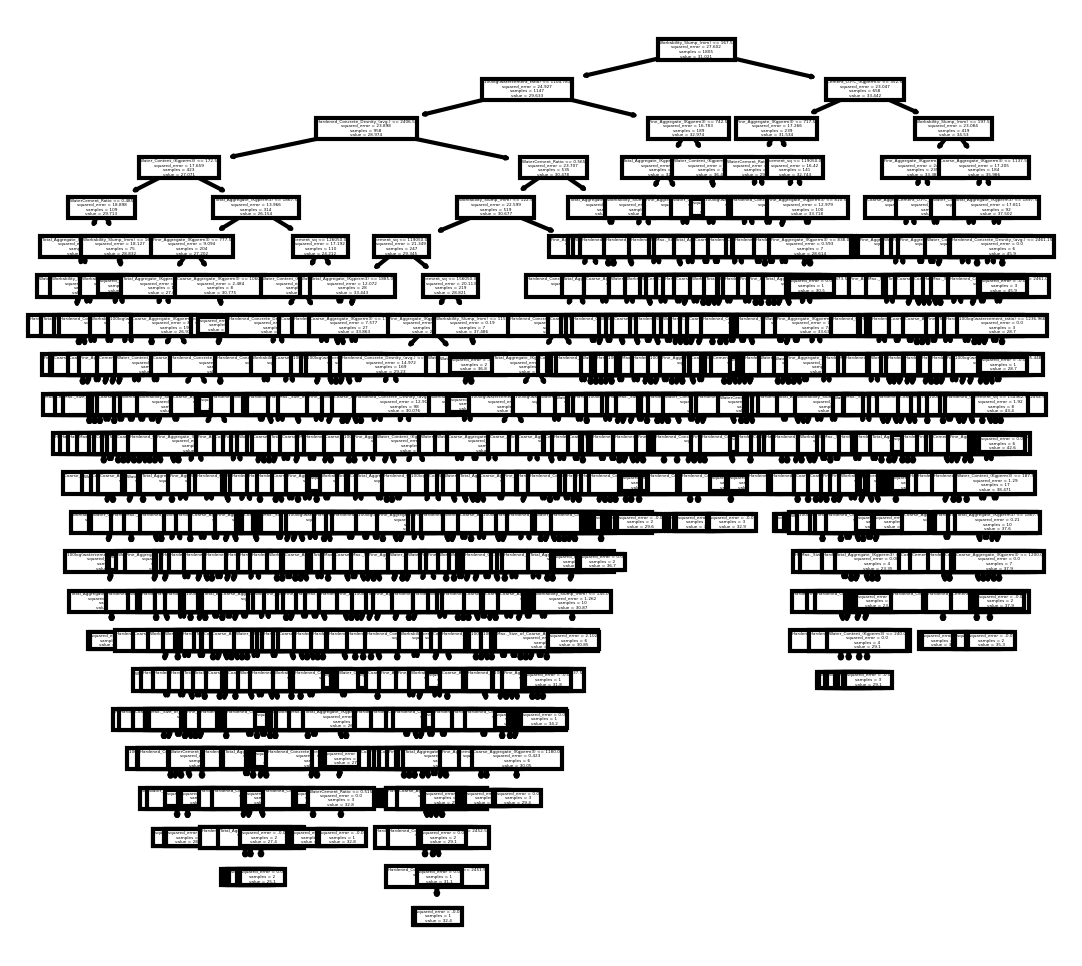

In [61]:
from sklearn import tree
fig,axes=plt.subplots(figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=list(x_test),filled=False)
plt.show()

In [64]:
df[df.duplicated()]

Type_of_course_Aggregate Type_of_Fine_Aggregate_  \
16                    Crushed                 Natural   
23                    Crushed                 Natural   
31                    Crushed                 Natural   
41                    Natural                 Natural   
74                    Natural                 Natural   
...                       ...                     ...   
2252                        0                       0   
2253                        0                       0   
2254                        0                       0   
2255                        0                       0   
2256                        0                       0   

      Max._Size_of_Coarse_Aggregate_(mm)  Cement_O.P.C_(Kgperm3)  cement_sq  \
16                                    20                     340     115600   
23                                    20                     350     122500   
31                                    20                     400     160000   
41                                    40                     375     140625   
74                                    20                     330     108900   
...                                  ...                     ...        ...   
2252                                  20                     375     140625   
2253                                  20                     375     140625   
2254                                  20                     365     133225   
2255                                  20                     385     148225   
2256                                  20                     340     115600   

      WaterCement_Ratio  100log(watercement_ratio)  Water_Content_(Kgperm3)  \
16                 0.53                 915.935735                      180   
23                 0.50                1000.000000                      180   
31                 0.45                1152.003093                      180   
41                 0.48                1058.893689                      180   
74                 0.48                1058.893689                      160   
...                 ...                        ...                      ...   
2252               0.48                1058.893689                      180   
2253               0.45                1152.003093                      170   
2254               0.51                 971.430848                      185   
2255               0.47                1089.267338                      180   
2256               0.47                1089.267338                      160   

      Total_Aggregate_(Kgperm3)  Fine_Aggregate_(Kgperm3)  \
16                         1930                       770   
23                         1910                       710   
31                         1840                       770   
41                         1845                       830   
74                         1910                       820   
...                         ...                       ...   
2252                       1845                       665   
2253                       1855                       725   
2254                       1900                       800   
2255                       1815                       655   
2256                       1900                       760   

      Coarse_Aggregate_(Kgperm3)  Workability_Slump_(mm)  \
16                          1160                     120   
23                          1200                      90   
31                          1070                     200   
41                          1015                     220   
74                          1090                     160   
...                          ...                     ...   
2252                        1180                     150   
2253                        1130                     175   
2254                        1200                     135   
2255                        1160                      95   
2256                        1

In [267]:
df=pd.read_csv("C:\\Users\\Andrew\\Downloads\\2500 Concrete design mixes1.csv")

#sns.pairplot(df)
#plt.show()

#print(df.head())

X=df.iloc[:,2:-1]
y=df.iloc[:,-1]
X

from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
x_train,x_valid,y_train,y_valid=train_test_split(X,y,test_size=0.3)
for i in range(1,20):
    model=DecisionTreeRegressor(max_depth=i)

    model.fit(x_train,y_train)

    y_pred=model.predict(x_valid)

    #print("model.coef_",model.coef_)

    #print("model.intercept_",model.intercept_)
    print("----------------For depth = ",i,"--------------------")
    print("mean_squared_error(y_test,y_pred)",mean_absolute_percentage_error(y_valid,y_pred))

    print("r2_score(y_test,y_pred)",r2_score(y_valid,y_pred))


----------------For depth =  1 --------------------
mean_squared_error(y_test,y_pred) 0.1366624184856142
r2_score(y_test,y_pred) 0.1210553426502845
----------------For depth =  2 --------------------
mean_squared_error(y_test,y_pred) 0.13090513095163583
r2_score(y_test,y_pred) 0.1794576128733465
----------------For depth =  3 --------------------
mean_squared_error(y_test,y_pred) 0.12470459025792849
r2_score(y_test,y_pred) 0.2457073188750929
----------------For depth =  4 --------------------
mean_squared_error(y_test,y_pred) 0.11797477465673377
r2_score(y_test,y_pred) 0.3178981432799124
----------------For depth =  5 --------------------
mean_squared_error(y_test,y_pred) 0.10875990781143903
r2_score(y_test,y_pred) 0.3847339571461007
----------------For depth =  6 --------------------
mean_squared_error(y_test,y_pred) 0.1009000917006505
r2_score(y_test,y_pred) 0.4472430919939403
----------------For depth =  7 --------------------
mean_squared_error(y_test,y_pred) 0.09064397770548695
r2

In [272]:
df=pd.read_csv("C:\\Users\\Andrew\\Downloads\\2500 Concrete design mixes1.csv")

#sns.pairplot(df)
#plt.show()

#print(df.head())

X=df.iloc[:,2:-1]
y=df.iloc[:,-1]
X

from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
x_train,x_valid,y_train,y_valid=train_test_split(X,y,test_size=0.3)
for i in range(1,20):
    model=KNeighborsRegressor(n_neighbors=i)

    model.fit(x_train,y_train)

    y_pred=model.predict(x_valid)

    #print("model.coef_",model.coef_)

    #print("model.intercept_",model.intercept_)
    print("----------------For depth = ",i,"--------------------")
    print("mean_squared_error(y_test,y_pred)",mean_absolute_percentage_error(y_valid,y_pred))

    print("r2_score(y_test,y_pred)",r2_score(y_valid,y_pred))


----------------For depth =  1 --------------------
mean_squared_error(y_test,y_pred) 0.019838996102710844
r2_score(y_test,y_pred) 0.8598563479209718
----------------For depth =  2 --------------------
mean_squared_error(y_test,y_pred) 0.03604162783180767
r2_score(y_test,y_pred) 0.8149946625427043
----------------For depth =  3 --------------------
mean_squared_error(y_test,y_pred) 0.04816649771538891
r2_score(y_test,y_pred) 0.7632101991301847
----------------For depth =  4 --------------------
mean_squared_error(y_test,y_pred) 0.06122216937564127
r2_score(y_test,y_pred) 0.7005252423990891
----------------For depth =  5 --------------------
mean_squared_error(y_test,y_pred) 0.07286902197984689
r2_score(y_test,y_pred) 0.6406887614662966
----------------For depth =  6 --------------------
mean_squared_error(y_test,y_pred) 0.08266845847178257
r2_score(y_test,y_pred) 0.5877774980952328
----------------For depth =  7 --------------------
mean_squared_error(y_test,y_pred) 0.08918648759426759

In [8]:
df=pd.read_csv("C:\\Users\\Andrew\\Downloads\\Concrete design mixes1.csv")

In [9]:
df.corr()

Passing_0.6_mm_Sieve_(%)  \
Passing_0.6_mm_Sieve_(%)                                      1.000000   
Cement_O.P.C_(Kgperm3)                                       -0.404479   
WaterCement_Ratio                                             0.354438   
Water_Content_(Kgperm3)                                       0.002335   
Additive_Type_&_Dosage_(per100_kg_of_cement)                  0.585500   
Total_Aggregate_(Kgperm3)                                     0.102901   
Fine_Aggregate_(Kgperm3)                                     -0.061629   
Coarse_Aggregate_(Kgperm3)                                    0.065155   
Workability_Slump_(mm)                                       -0.163823   
Hardened_Concrete_Desnity_(avg.)                              0.034515   
Target_Mean_Strength_(Npermm2)                               -0.597428   

                                              Cement_O.P.C_(Kgperm3)  \
Passing_0.6_mm_Sieve_(%)                                   -0.404479   
Cement_O.P.C_(Kgperm3)                                      1.000000   
WaterCement_Ratio                                           0.029736   
Water_Content_(Kgperm3)                                     0.501154   
Additive_Type_&_Dosage_(per100_kg_of_cement)               -0.373890   
Total_Aggregate_(Kgperm3)                                   0.367975   
Fine_Aggregate_(Kgperm3)                                    0.172582   
Coarse_Aggregate_(Kgperm3)                                  0.268184   
Workability_Slump_(mm)                                      0.226533   
Hardened_Concrete_Desnity_(avg.)                            0.120555   
Target_Mean_Strength_(Npermm2)                              0.635152   

                                              WaterCement_Ratio  \
Passing_0.6_mm_Sieve_(%)                               0.354438   
Cement_O.P.C_(Kgperm3)                                 0.029736   
WaterCement_Ratio                                      1.000000   
Water_Content_(Kgperm3)                                0.673096   
Additive_Type_&_Dosage_(per100_kg_of_cement)           0.188425   
Total_Aggregate_(Kgperm3)                              0.552738   
Fine_Aggregate_(Kgperm3)                               0.314081   
Coarse_Aggregate_(Kgperm3)                             0.241305   
Workability_Slump_(mm)                                -0.211373   
Hardened_Concrete_Desnity_(avg.)                       0.143124   
Target_Mean_Strength_(Npermm2)                        -0.007689   

                                              Water_Content_(Kgperm3)  \
Passing_0.6_mm_Sieve_(%)                                     0.002335   
Cement_O.P.C_(Kgperm3)                                       0.501154   
WaterCement_Ratio                                            0.673096   
Water_Content_(Kgperm3)                                      1.000000   
Additive_Type_&_Dosage_(per100_kg_of_cement)                -0.133757   
Total_Aggregate_(Kgperm3)                                    0.383235   
Fine_Aggregate_(Kgperm3)                                     0.234616   
Coarse_Aggregate_(Kgperm3)                                   0.158717   
Workability_Slump_(mm)                                      -0.088925   
Hardened_Concrete_Desnity_(avg.)                             0.124051   
Target_Mean_Strength_(Npermm2)                               0.258573   

                                              Additive_Type_&_Dosage_(per100_kg_of_cement)  \
Passing_0.6_mm_Sieve_(%)                                                          0.585500   
Cement_O.P.C_(Kgperm3)                                                           -0.373890   
WaterCement_Ratio                                                                 0.188425   
Water_Content_(Kgperm3)                                                          -0.133757   
Additive_Type_&_Dosage_(per100_kg_of_cement)                                      1.000000   
Total_Aggregate_(Kgperm3)                     

In [61]:
df.head()

X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X

from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=linear_model.LinearRegression()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("model.coef_",model.coef_)

print("model.intercept_",model.intercept_)

print("mean_squared_error(y_test,y_pred)",mean_squared_error(y_test,y_pred))

print("r2_score(y_test,y_pred)",r2_score(y_test,y_pred))

model.coef_ [-0.06375837  0.01513381 -4.9210457  -4.58167118 -1.26297732  0.00887702]
model.intercept_ 38.65492758241928
mean_squared_error(y_test,y_pred) 1.6374815740449493
r2_score(y_test,y_pred) 0.7542128733056984


In [97]:
df=pd.read_csv("C:\\Users\\Andrew\\Downloads\\Concrete design mixes-3.csv")

In [98]:
df.corr()

Passing_0.6_mm_Sieve_(%)  \
Passing_0.6_mm_Sieve_(%)                                      1.000000   
Cement_O.P.C_(Kgperm3)                                       -0.528211   
WaterCement_Ratio                                             0.399376   
cper(s+g)                                                    -0.380016   
Additive_Type_&_Dosage_(per100_kg_of_cement)                  0.585001   
Workability_Slump_(mm)                                       -0.173327   
Target_Mean_Strength_(Npermm2)                               -0.829755   

                                              Cement_O.P.C_(Kgperm3)  \
Passing_0.6_mm_Sieve_(%)                                   -0.528211   
Cement_O.P.C_(Kgperm3)                                      1.000000   
WaterCement_Ratio                                          -0.428633   
cper(s+g)                                                   0.843123   
Additive_Type_&_Dosage_(per100_kg_of_cement)               -0.483907   
Workability_Slump_(mm)                                      0.167765   
Target_Mean_Strength_(Npermm2)                              0.564935   

                                              WaterCement_Ratio  cper(s+g)  \
Passing_0.6_mm_Sieve_(%)                               0.399376  -0.380016   
Cement_O.P.C_(Kgperm3)                                -0.428633   0.843123   
WaterCement_Ratio                                      1.000000  -0.332143   
cper(s+g)                                             -0.332143   1.000000   
Additive_Type_&_Dosage_(per100_kg_of_cement)           0.207848  -0.359271   
Workability_Slump_(mm)                                -0.358994   0.111139   
Target_Mean_Strength_(Npermm2)                        -0.453480   0.409272   

                                              Additive_Type_&_Dosage_(per100_kg_of_cement)  \
Passing_0.6_mm_Sieve_(%)                                                          0.585001   
Cement_O.P.C_(Kgperm3)                                                           -0.483907   
WaterCement_Ratio                                                                 0.207848   
cper(s+g)                                                                        -0.359271   
Additive_Type_&_Dosage_(per100_kg_of_cement)                                      1.000000   
Workability_Slump_(mm)                                                            0.116909   
Target_Mean_Strength_(Npermm2)                                                   -0.604625   

                                              Workability_Slump_(mm)  \
Passing_0.6_mm_Sieve_(%)                                   -0.173327   
Cement_O.P.C_(Kgperm3)                                      0.167765   
WaterCement_Ratio                                          -0.358994   
cper(s+g)                                                   0.111139   
Additive_Type_&_Dosage_(per100_kg_of_cement)                0.116909   
Workability_Slump_(mm)                                      1.000000   
Target_Mean_Strength_(Npermm2)                              0.200353   

                                              Target_Mean_Strength_(Npermm2)  
Passing_0.6_mm_Sieve_(%)                                           -0.829755  
Cement_O.P.C_(Kgperm3)                                              0.564935  
WaterCement_Ratio                                                  -0.453480  
cper(s+g)                                                           0.409272  
Additive_Type_&_Dosage_(per100_kg_of_cement)                       -0.604625  
Workability_Slump_(mm)                                              0.200353  
Target_Mean_Strength_(Npermm2)                                      1.000000

In [113]:
df.drop_duplicates(subset=None, inplace=True)

In [114]:
len(df)

629

In [115]:
df.corr()

Passing_0.6_mm_Sieve_(%)  \
Passing_0.6_mm_Sieve_(%)                                      1.000000   
Cement_O.P.C_(Kgperm3)                                       -0.506602   
WaterCement_Ratio                                             0.397114   
cper(s+g)                                                    -0.284237   
Additive_Type_&_Dosage_(per100_kg_of_cement)                  0.456283   
Workability_Slump_(mm)                                       -0.173170   
Target_Mean_Strength_(Npermm2)                               -0.767961   

                                              Cement_O.P.C_(Kgperm3)  \
Passing_0.6_mm_Sieve_(%)                                   -0.506602   
Cement_O.P.C_(Kgperm3)                                      1.000000   
WaterCement_Ratio                                          -0.420873   
cper(s+g)                                                   0.730026   
Additive_Type_&_Dosage_(per100_kg_of_cement)               -0.413895   
Workability_Slump_(mm)                                      0.178618   
Target_Mean_Strength_(Npermm2)                              0.538386   

                                              WaterCement_Ratio  cper(s+g)  \
Passing_0.6_mm_Sieve_(%)                               0.397114  -0.284237   
Cement_O.P.C_(Kgperm3)                                -0.420873   0.730026   
WaterCement_Ratio                                      1.000000  -0.221377   
cper(s+g)                                             -0.221377   1.000000   
Additive_Type_&_Dosage_(per100_kg_of_cement)           0.157145  -0.204638   
Workability_Slump_(mm)                                -0.347473   0.077469   
Target_Mean_Strength_(Npermm2)                        -0.450735   0.307851   

                                              Additive_Type_&_Dosage_(per100_kg_of_cement)  \
Passing_0.6_mm_Sieve_(%)                                                          0.456283   
Cement_O.P.C_(Kgperm3)                                                           -0.413895   
WaterCement_Ratio                                                                 0.157145   
cper(s+g)                                                                        -0.204638   
Additive_Type_&_Dosage_(per100_kg_of_cement)                                      1.000000   
Workability_Slump_(mm)                                                            0.169681   
Target_Mean_Strength_(Npermm2)                                                   -0.447669   

                                              Workability_Slump_(mm)  \
Passing_0.6_mm_Sieve_(%)                                   -0.173170   
Cement_O.P.C_(Kgperm3)                                      0.178618   
WaterCement_Ratio                                          -0.347473   
cper(s+g)                                                   0.077469   
Additive_Type_&_Dosage_(per100_kg_of_cement)                0.169681   
Workability_Slump_(mm)                                      1.000000   
Target_Mean_Strength_(Npermm2)                              0.199413   

                                              Target_Mean_Strength_(Npermm2)  
Passing_0.6_mm_Sieve_(%)                                           -0.767961  
Cement_O.P.C_(Kgperm3)                                              0.538386  
WaterCement_Ratio                                                  -0.450735  
cper(s+g)                                                           0.307851  
Additive_Type_&_Dosage_(per100_kg_of_cement)                       -0.447669  
Workability_Slump_(mm)                                              0.199413  
Target_Mean_Strength_(Npermm2)                                      1.000000

In [67]:
df=df.drop(["Workability_Slump_(mm)"],axis=1)

In [126]:
df.head()

X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X

from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=linear_model.LinearRegression()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("model.coef_",model.coef_)

print("model.intercept_",model.intercept_)

print("mean_squared_error(y_test,y_pred)",mean_squared_error(y_test,y_pred))

print("r2_score(y_test,y_pred)",r2_score(y_test,y_pred))

model.coef_ [-1.54620224e-03  5.07493083e-04 -2.55392101e-01 -1.60451314e-01
 -1.78296013e-02  5.99441265e-05]
model.intercept_ 3.6965368051403833
mean_squared_error(y_test,y_pred) 0.000755815902483541
r2_score(y_test,y_pred) 0.7968802443244246


In [181]:
df.head()
#df_test=df.iloc[np.random.choice(np.arange(0,len(df)),130,replace=False)]
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X

from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

k = 5
kf = KFold(n_splits=k, random_state=None)
rsq=[]

model=linear_model.LinearRegression()

for train_index , test_index in kf.split(x_train):
    X_train , X_test = x_train.iloc[train_index,:],x_train.iloc[test_index,:]
    #print(train_index , test_index)
    print(type(y_train),type(train_index))
    Y_train , Y_test = pd.DataFrame(y_train).iloc[train_index,-1] , pd.DataFrame(y_train).iloc[test_index,-1]
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    rsq.append(r2_score(Y_test,y_pred))
    
print("avg rsq value: ",sum(rsq)/k)
print("model.coef_",model.coef_)

print("model.intercept_",model.intercept_)

print("mean_squared_error(y_test,y_pred)",mean_squared_error(Y_test,y_pred))

print("r2_score(y_test,y_pred)",r2_score(Y_test,y_pred))

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
avg rsq value:  0.6099884892083948
model.coef_ [-1.61012615e-03  5.32897293e-04 -2.25258038e-01 -3.13893574e-02
 -1.30402855e-02  4.48077343e-05]
model.intercept_ 3.6489433257371693
mean_squared_error(y_test,y_pred) 0.0030238314103392477
r2_score(y_test,y_pred) 0.5021144761861445


In [130]:
x_train.index

Int64Index([ 878, 1363, 1309,    1, 1401, 1325,  433,   93,    5, 1301,
            ...
            1501,  427,  481,  517,  309, 1038,  920,  263, 1176, 1298],
           dtype='int64', length=503)

In [138]:
type(y)

pandas.core.series.Series

In [ ]:
x_

In [166]:
a = list(pd.DataFrame(y_train).iloc[train_index,-1].index)
a.sort()

In [170]:
train_index

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
       218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
       257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269,
       270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 28

In [172]:
pd.DataFrame(y_train).iloc[train_index,-1]

1355    3.761203
1110    3.761203
1360    3.761203
271     3.637589
1331    3.761203
          ...   
25      3.637589
927     3.637589
1442    3.761203
487     3.637589
244     3.637589
Name: Target_Mean_Strength_(Npermm2), Length: 402, dtype: float64